# Applying Machine Learning Models

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
# metrics: 計測 → 評価
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# カーネルなしSVM（SVC: Support Vector Classifierの略）
from sklearn.svm import LinearSVC
# カーネル法を用いたSVM
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [3]:
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  angle(tBodyAccMean,gravity)  \
0         -0.923527         -0.934724  ...                    -0.112754   
1         -0.957686         -0.943068  ...                     0.053477   
2         -0.977469         -0.938692  ...                    -0.118559   
3         -0.989302         -0.938692  ...                    -0.036788   
4         -0.990441         -0.942469  ...                     0.123320   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   
2                              0.177899                          0.100699   
3                             -0.012892                          0.640011   
4                              0.122542                          0.693578   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   
2                              0.808529             -0.848933   
3                             -0.485366             -0.848649   
4                             -0.615971             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  Activity  ActivityName  
0              0.179941             -0.058627        1         5      STANDING  
1              0.180289             -0.054317        1         5      STANDING  
2              0.180637             -0.049118        1         5      STANDING  
3              0.181935             -0.047663        1         5      STANDING  
4              0.185151             -0.043892        1         5      STANDING  

[5 rows x 564 columns]

## Making Data Set (ユーザ認識を行うので行動分類とは別のデータセットにしたい)

In [4]:
df_concat = pd.concat([train, test])

print(df_concat.shape)


(10299, 564)


## Making Data for Model

In [5]:
from sklearn.model_selection import train_test_split

X = df_concat.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y = df_concat['subject']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# # 訓練用
# X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
# y_train = train['subject']

# # テスト用
# X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
# y_test = test['subject']

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((6900, 561),(6900,))
X_test  and y_test  : ((3399, 561),(3399,))


In [6]:
X_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
1469           0.198934          -0.041649          -0.208719   
2314           0.234311          -0.015930          -0.109846   
2603           0.271017          -0.016169          -0.105228   
996            0.240172          -0.010125          -0.132276   
1579           0.127938          -0.023825          -0.099492   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
1469         -0.248394         -0.418125         -0.026884         -0.294487   
2314         -0.978540         -0.994457         -0.989108         -0.977661   
2603         -0.984479         -0.978497         -0.965314         -0.991167   
996          -0.324234          0.086649         -0.445843         -0.388274   
1579          0.141873         -0.008185         -0.243573          0.051355   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
1469         -0.424444          0.032922         -0.112486  ...   
2314         -0.994001         -0.990546         -0.940744  ...   
2603         -0.981600         -0.973454         -0.906316  ...   
996          -0.006090         -0.378945         -0.041089  ...   
1579         -0.097595         -0.306885          0.316041  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
1469                        -0.038050                        -0.278706   
2314                         0.353727                        -0.626749   
2603                        -0.184940                        -0.056341   
996                          0.071036                        -0.288763   
1579                         0.000685                        -0.579174   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
1469                        -0.668940                    -0.080235   
2314                        -0.805119                    -0.043474   
2603                        -0.488093                    -0.237885   
996                         -0.728757                     0.534596   
1579                        -0.873940                     0.846190   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
1469                             -0.385921                          0.882797   
2314                              0.278353                          0.369072   
2603                              0.468426                         -0.225326   
996                              -0.692795                         -0.497539   
1579                             -0.654844                          0.789931   

      angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
1469                             -0.046086             -0.431323   
2314                              0.535144              0.645103   
2603                              0.255934              0.439181   
996                              -0.012647             -0.801466   
1579                             -0.610322             -0.875557   

      angle(Y,gravityMean)  angle(Z,gravityMean)  
1469              0.217011              0.403901  
2314             -0.579749             -0.422172  
2603             -0.701868             -0.275076  
996               0.233206             -0.007254  
1579              0.183465              0.005903  

[5 rows x 561 columns]

Labels that are usuful in plotting confusion matrix

In [7]:

labels_train = list()
for i in y_train:
    if i not in labels_train:
        labels_train.append(i)

labels_test = list()
for i in y_test:
    if i not in labels_test:
        labels_test.append(i)

print(labels_train)
print(labels_test)

labels = list()
for i in range(1, 31):
    labels.append(i)

print(labels)

[7, 20, 15, 10, 4, 19, 21, 3, 16, 2, 26, 14, 24, 8, 28, 5, 23, 6, 30, 29, 12, 18, 25, 13, 17, 11, 22, 27, 9, 1]
[26, 19, 2, 17, 9, 18, 5, 1, 14, 4, 24, 10, 29, 28, 30, 8, 21, 6, 3, 15, 16, 12, 13, 20, 25, 27, 11, 22, 23, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Let's make a function to plot the confusion matrix

In [8]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams["font.size"] = 9

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    # normalize → 正規化
    if normalize:
        # cmの値は予測結果と実際の値の一致数なので，それを列の合計で割ると確率
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # np.newaxisは次元を追加
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # plt.text(): 座標（x, y），表示するテキスト，文字位置，色指定
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let's make a function to run any model specified

In [9]:
# 任意のモデルを実行
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_nomalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model...')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    # 予測結果を格納
    results['predicted'] = y_pred
    
    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    # output confusion matrix
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(15, 15))
    plt.grid(b=False) # グリッドを非表示
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    # print('****************| Classifiction Report |****************')
    # classification_report = metrics.classification_report(y_test, y_pred)
    
    # # store report in results
    # results['classification_report'] = classification_report
    # print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results
    

In [10]:
# 任意のモデルを実行
def perform_model_epsilon(model, X_train, y_train, X_test, y_test, class_labels, cm_nomalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model...')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    # 予測結果を格納
    results['predicted'] = y_pred
    
    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    # output confusion matrix
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(15, 15))
    plt.grid(b=False) # グリッドを非表示
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    # print('****************| Classifiction Report |****************')
    # classification_report = metrics.classification_report(y_test, y_pred)
    
    # # store report in results
    # results['classification_report'] = classification_report
    # print(classification_report)
    
    # get f1 score
    f1 = metrics.f1_score(y_test, y_pred, average="macro")
    print("\n F1 Score:{}".format(f1))
    
    # add the trained model to the results
    results['model'] = model
    
    return results, f1
    

Make function to print the gridsearch Parameters

In [11]:
# 同一モデルでの値を表示
def print_grid_search_attributes(model):
    
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))
    
    # parameters that gave best results while perfoming grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))
    
    # number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal nmber of cross validation sets: {}'.format(model.n_splits_))
    
    # Average cross validated score of the best estimator, from the Grid Search
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of Best estimator : {}\n\n\n\n'.format(model.best_score_))

## 1. Logistic Regression with Grid Search

[グリッドサーチ参考サイト](https://data-analysis-stats.jp/機械学習/grid-search-のパラメタチューニング/)

In [ ]:
'''
GridSearchCVのパラメータ

estimator : estimator object
チューニングを行うモデル

param_grid : dict or list of dictionaries
パラメタ候補値を「パラメタ名, 候補値リスト」の辞書で与える

scoring : string, callable, list/tuple, dict or None, default: None
複数のメトリックを評価するには、文字例のリストか、の辞書で与える

n_jobs : int or None, optional (default=None)
同時実行数(-1にするとコア数で同時実行)

pre_dispatch : int, or string, optional
同時実行数にディスパッチされるジョブの数を設定する

iid : boolean, default=’warn’
Trueの場合、各テストセットのサンプル数で重み付けされた、折り畳み全体の平均スコアを返す

cv : int, cross-validation generator or an iterable, optional
Cross validationの分割数(デフォルト値は3)

refit : boolean, string, or callable, default=True
Trueだと最良だったパラメタを使い学習データ全体で再学習する

verbose : integer
ログ出力レベル（高ければ高いほど、長い出力）

error_score : ‘raise’ or numeric
エラーが発生した場合にスコアに割り当てる値。

return_train_score : boolean, default=False
Falseの場合は、トレーニングスコアを含まない
'''


import warnings
# 収束しなかった場合のwarning
from sklearn.exceptions import ConvergenceWarning
# warningを無視する
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
# C: 正則化項の係数（正則化の強さの逆数）
# penalty: 正則化をL1ノルムでやるかL2ノルムでやるかを，l1 または l2 から選択
param_grid = [{
    'C': [0.01, 0.1, 1, 10, 20, 30],
    'penalty': ['l2', 'l1']
}]


log_reg = linear_model.LogisticRegression(random_state=0)
log_reg_grid = GridSearchCV(log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=1)
log_reg_grid_results = perform_model(log_reg_grid, X_train.values, y_train.values, X_test.values, y_test.values, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

## 1. Logistic Regression in Noise
[ラプラスノイズ 参考サイト](https://numpy.org/doc/stable/reference/random/generated/numpy.random.laplace.html)
> numpy.random.laplace( μ, b, size)<br>
μ: 平均, b: スケール, size: 出力サイズ(次元)

In [ ]:
# precision = 0.1  # precision: 精度
# limit_x = 5
# linspace: num (個)の等差数列を作成
# epsilons = np.linspace(1, 5, num=int(limit_x/precision))
epsilons = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 4, 5]  # [0.1, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5]
f1_array_lr = []

for epsilon in epsilons:
    # epsilon = 0.1
    # default sensitivity = 1.0

    X_train_noise = X_train.copy()
    X_test_noise = X_test.copy()

    X_train_noise_array = X_train_noise.values
    X_test_noise_array = X_test_noise.values

    for i in range(len(X_train_noise_array)):
        X_train_noise_array[i] = X_train_noise_array[i] + np.random.laplace(0, 1.0/epsilon, X_train_noise_array[i].shape)
    for j in range(len(X_test_noise_array)):
        X_test_noise_array[j] = X_test_noise_array[j] + np.random.laplace(0, 1.0/epsilon, X_test_noise_array[j].shape)


    # start Grid search
    # C: 正則化項の係数（正則化の強さの逆数）
    # penalty: 正則化をL1ノルムでやるかL2ノルムでやるかを，l1 または l2 から選択
    param_grid = [{
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2', 'l1']
    }]
    log_reg = linear_model.LogisticRegression(random_state=0)
    log_reg_grid = GridSearchCV(log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=1)
    print("As epsilon = {}".format(epsilon))
    log_reg_grid_results, f1 = perform_model_epsilon(log_reg_grid, X_train_noise_array, y_train, X_test_noise_array, y_test, class_labels=labels)
    
    f1_array_lr.append(f1)

    # observe the attributes of the model
    print_grid_search_attributes(log_reg_grid_results['model'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_lr, label='Logistic Regression in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()

## 2. Linear SVC with GridSearch

In [ ]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
# tol: 停止基準の許容範囲
lr_svc = LinearSVC(tol=0.00005, random_state=0)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

In [ ]:
import warnings
# 収束しなかった場合のwarning
from sklearn.exceptions import ConvergenceWarning
# warningを無視する
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

epsilons = [1, 1.5, 2, 2.5, 3, 4, 5]


for epsilon in epsilons:
    # epsilon = 0.1
    # default sensitivity = 1.0
    
    print("As epsilon = {}".format(epsilon))

    X_train_noise = X_train.copy()
    X_test_noise = X_test.copy()

    X_train_noise_array = X_train_noise.values
    X_test_noise_array = X_test_noise.values

    for i in range(len(X_train_noise_array)):
        X_train_noise_array[i] = X_train_noise_array[i] + np.random.laplace(0, 1.0/epsilon, X_train_noise_array[i].shape)
    for j in range(len(X_test_noise_array)):
        X_test_noise_array[j] = X_test_noise_array[j] + np.random.laplace(0, 1.0/epsilon, X_test_noise_array[j].shape)


    parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
    # tol: 停止基準の許容範囲
    lr_svc = LinearSVC(tol=0.00005, random_state=0)
    lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
    lr_svc_grid_results = perform_model(lr_svc_grid, X_train_noise_array, y_train, X_test_noise_array, y_test, class_labels=labels)

    # observe the attributes of the model 
    print_grid_search_attributes(lr_svc_grid_results['model'])

## 3. Kernel SVM with GridSearch
ガウスカーネル
𝐾(𝑥𝑖,𝑥𝑗)=exp(−𝛾||𝑥𝑖–𝑥𝑗||2)

In [ ]:
# gamma: カーネル係数
# kernel: アルゴリズムで使用されるカーネルタイプを指定
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

In [ ]:
import warnings
# 収束しなかった場合のwarning
from sklearn.exceptions import ConvergenceWarning
# warningを無視する
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

epsilons = [1.5, 2, 2.5, 3, 4, 5]


for epsilon in epsilons:
    # epsilon = 0.1
    # default sensitivity = 1.0
    
    print("As epsilon = {}".format(epsilon))

    X_train_noise = X_train.copy()
    X_test_noise = X_test.copy()

    X_train_noise_array = X_train_noise.values
    X_test_noise_array = X_test_noise.values

    for i in range(len(X_train_noise_array)):
        X_train_noise_array[i] = X_train_noise_array[i] + np.random.laplace(0, 1.0/epsilon, X_train_noise_array[i].shape)
    for j in range(len(X_test_noise_array)):
        X_test_noise_array[j] = X_test_noise_array[j] + np.random.laplace(0, 1.0/epsilon, X_test_noise_array[j].shape)
        
    
    # gamma: カーネル係数
    # kernel: ルゴリズムで使用されるカーネルタイプを指定
    parameters = {'C':[2,8,16],\
                'gamma': [ 0.0078125, 0.125, 2]}
    # カーネル関数： rbf = ガウスカーネル
    rbf_svm = SVC(kernel='rbf')
    rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters, n_jobs=-1)
    rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train_noise_array, y_train, X_test_noise_array, y_test, class_labels=labels)

    # observe the attributes of the model 
    print_grid_search_attributes(rbf_svm_grid_results['model'])


## 4. LightGBM with Oputuna

In [45]:
import optuna # パラメータチューニング
from sklearn.model_selection import train_test_split
import optuna.integration.lightgbm as lgb 

def objective(trial):
    
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
 
    param = {
        'boosting'          : 'gbdt',
        'metric'            : 'multi_logloss',
        'objective'         : 'multiclass',
        'num_class'         : 30
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    gbm = lgb.train(param, lgb_train, valid_sets=(lgb_train, lgb_eval))
    preds = gbm.predict(X_test, num_iteration=model.best_iteration)
    pred_labels = np.rint(preds)
    accuracy = metrics.accuracy_score(y_test, pred_labels)
    return accuracy
 
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

# def objective(trial):

#     lgb_train = lgb.Dataset(X_train, y_train)
#     lgb_eval  = lgb.Dataset(X_test, y_test, reference=lgb_train)
    
#     params_dist = {
#         'boosting'          : 'gbdt',
#         'metric'            : 'multi_logloss',
#         'objective'         : 'multiclass',
#         'learning_rate'     : 0.05,
#         'lambda_l1'         : trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2'         : trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'num_leaves'        : trial.suggest_int('num_leaves', 2, 512),
#         'feature_fraction'  : trial.suggest_uniform('feature_fraction', 0.4, 1.0),
#         'bagging_fraction'  : trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
#         'bagging_freq'      : trial.suggest_int('bagging_freq', 0, 10),
#         'min_child_samples' : trial.suggest_int('min_child_samples', 5, 100),
#         'seed'              : 42,
#         'verbosity'         : -1,
#     }
    
#     evaluation_results = {}
#     model = lgb.train(params_dist,
#                       lgb_train,
#                       valid_sets=(lgb_train, lgb_eval),
#                       valid_names=["Train", "Test"],
#                       evals_result=evaluation_results,
#                       num_boost_round=100000,
#                       early_stopping_rounds=100,
#                       verbose_eval=-1,
#                       )
    
#     y_prob_val = model.predict(X_test, num_iteration=model.best_iteration)
#     y_pred_val = np.round(y_prob_val)

#     score = roc_auc_score(np.round(y_test.values), np.round(y_pred_val))
#     return score 

ModuleNotFoundError: No module named 'lightgbm'

## 5. Random Forest Classifier with GridSearch

training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:05:12.968604

Predicting test data
==> testing time:- 0:00:00.102173

==> Accuracy:- 0.8346572521329803


 ********Confusion Matrix********

 [[104   0   1   0   0   0   0   0   0   0   1   0   0   0   1   0   0   2
    2   0   0   2   0   0   6   6   1   0   1   0]
 [  0  73   4   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    5   2   0   0   0   2   0   4   1   1   1   0]
 [  1   1  85   2   0   3   0   0   3   0   0   1   0   0   0   1   0   0
    4   0   2   2   0   2   2   3   2   6   0   3]
 [  0   0   0  92   2   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   2   4   0   0   0   0   0]
 [  0   0   0   6  76   8   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   1   3   3   0   0   4   0]
 [  0   0   2   1   2  95   0   0   0   0   1   0   0   0   0   0   0   0
    5   3   0   0   0   0   1   0   1   0   0   

/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_13767/1524874641.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) # グリッドを非表示


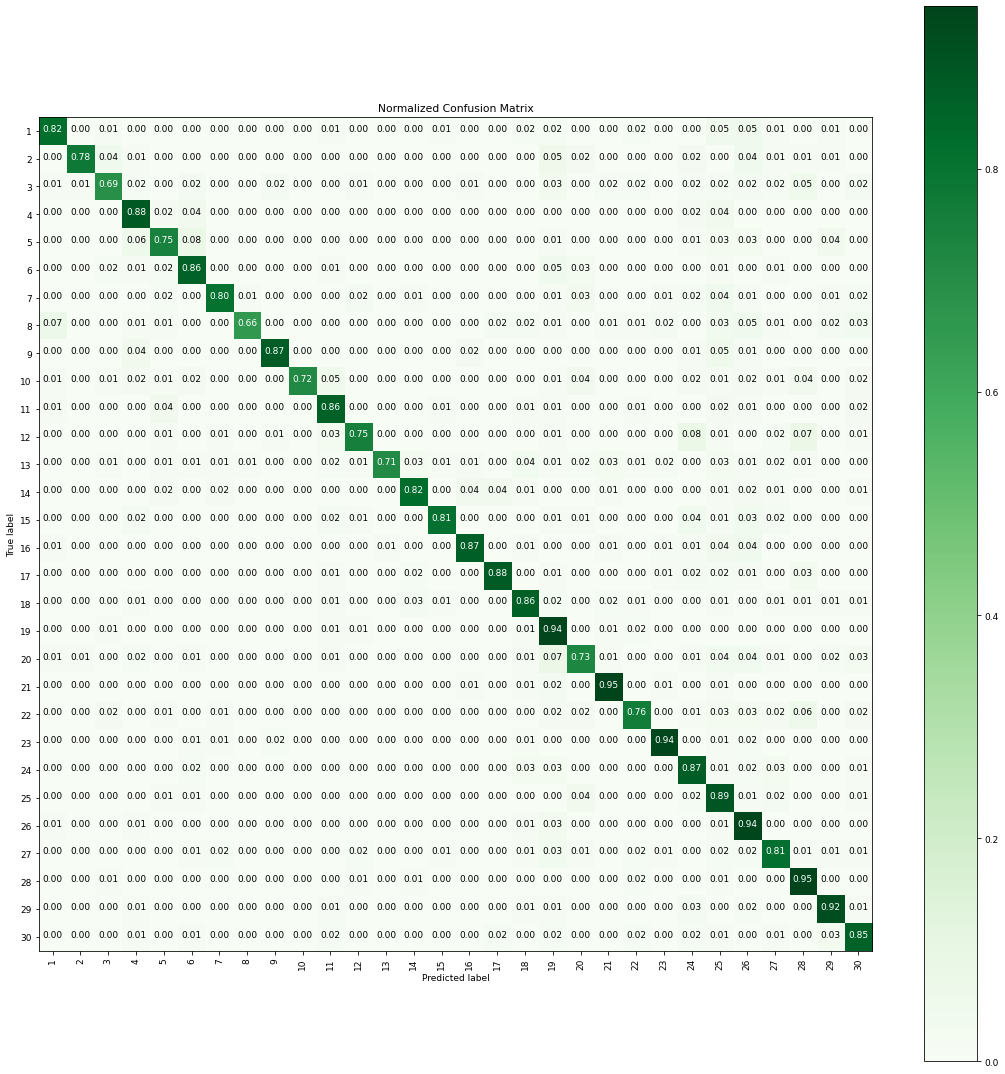


 F1 Score:0.8347058944393726


==> Best Estimator:
	RandomForestClassifier(max_depth=15, n_estimators=180)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 15, 'n_estimators': 180}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.8195652173913043






In [14]:
params = {'n_estimators': np.arange(100,201,20), 'max_depth':np.arange(3,16,3)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

As epsilon = 1.0
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:18.326464

Predicting test data
==> testing time:- 0:00:00.056184

==> Accuracy:- 0.04942630185348632


 ********Confusion Matrix********

 [[ 1  0  1  1  0  0  0  0  0  0  1  0  0  5  4  0  1  2  1  2 31  0  5 16
  17 11  4 12  0 12]
 [ 0  0  0  0  0  1  0  0  0  0  1  0  0  2  1  2  1  2  2  2 23  0  2  4
  26  6  4  7  0  8]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  1  1  2  3  2  0  3 16  0  7 12
  28 14  5 14  0 13]
 [ 1  0  0  1  0  0  0  0  0  0  1  0  0  0  1  1  2  6  1  0 16  1  2  7
  26 14  5 10  1  8]
 [ 1  0  0  0  1  0  0  0  0  0  0  0  0  3  0  1  2  2  1  1 12  2  6  6
  24 11  8 12  0  9]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  1  2  0  2  1  1  6 28  0  9  5
  19 10  6 12  2  5]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  2  1  0  2  3  2  2 26  0  7  9
  22 13  3 21  0  8]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  1  1  4  1 23

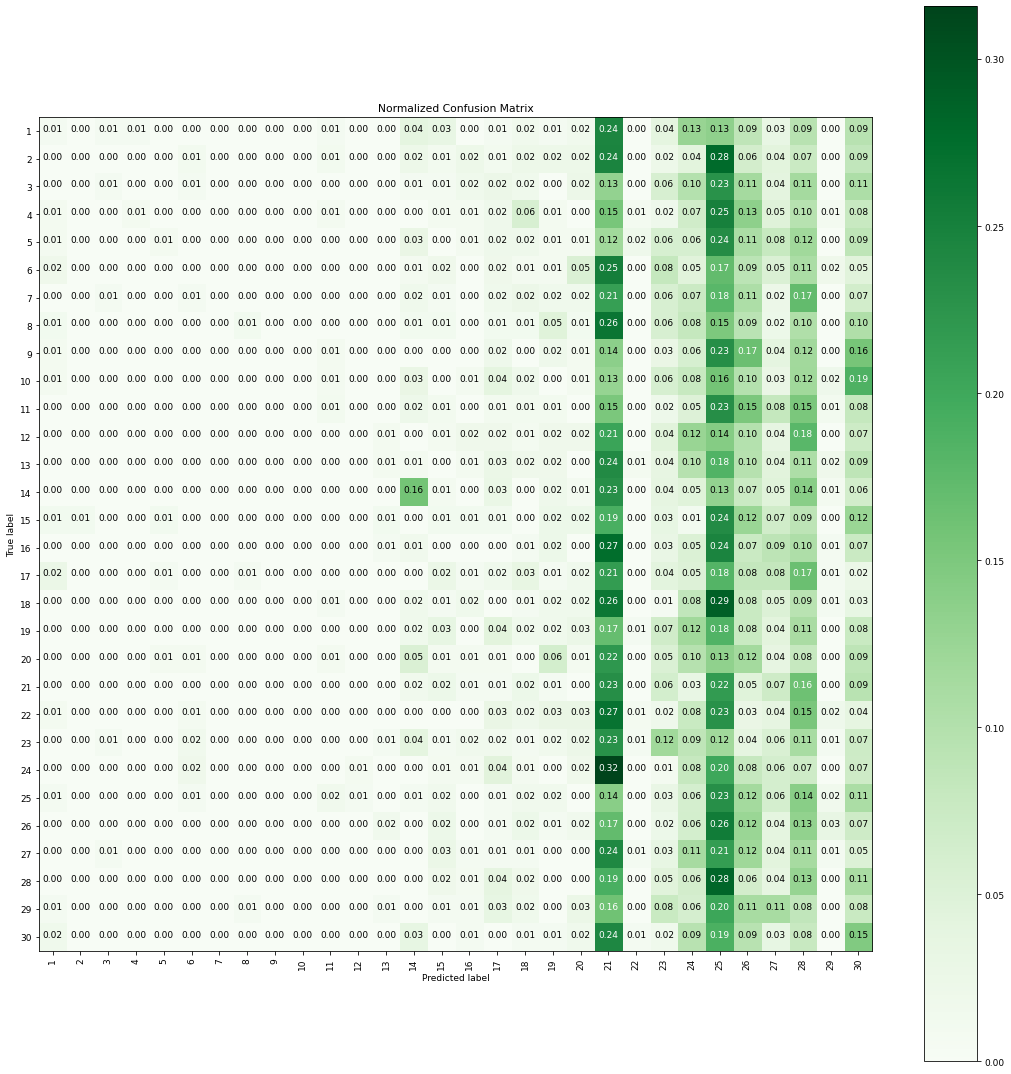


 F1 Score:0.03254801957888889
------
f1: *0.03254801957888889
------


==> Best Estimator:
	RandomForestClassifier(max_depth=9, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.05507246376811594




As epsilon = 1.2
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:18.256537

Predicting test data
==> testing time:- 0:00:00.063024

==> Accuracy:- 0.07002059429243895


 ********Confusion Matrix********

 [[ 3  0  0  0  0  0  0  1  0  1  0  0  0 10  0  0  3  1  1  4 12  1 11 14
  22  7  8 12  1 15]
 [ 2  0  0  1  0  0  0  0  0  0  0  0  0  3  1  0  1  0  1  3 13  0  3 10
  30  4  3  8  0 11]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  7  1  2  2 23  0  6 15
  32  3  6 16  0  8]
 [ 0  0  0  2  0  0  0  0  0  0  0  0

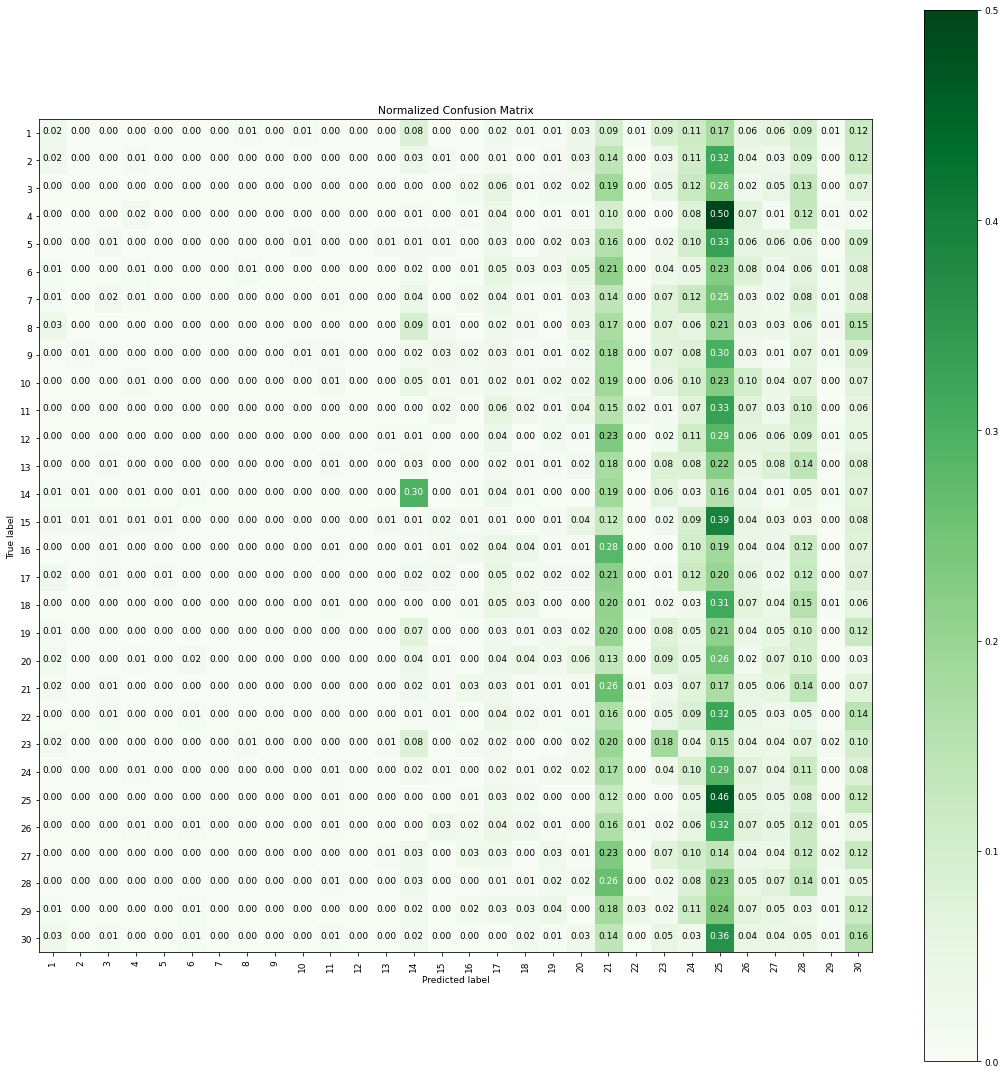


 F1 Score:0.04500024480707307
------
f1: *0.04500024480707307
------


==> Best Estimator:
	RandomForestClassifier(max_depth=9, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.07130434782608697




As epsilon = 1.4
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:06.562277

Predicting test data
==> testing time:- 0:00:00.052080

==> Accuracy:- 0.08178876140041189


 ********Confusion Matrix********

 [[ 2  0  0  1  0  3  0  0  0  0  0  0  1 13  0  0  0  0  1  4 32  0  5  4
  25 13  2  8  1 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  2  1  1  2 27  0  2 10
  25  3  5  5  0  5]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  1  1  3  4 40  0  2 10
  33  7  5 11  0  3]
 [ 0  0  1  0  0  0  0  0  0  0  0  0

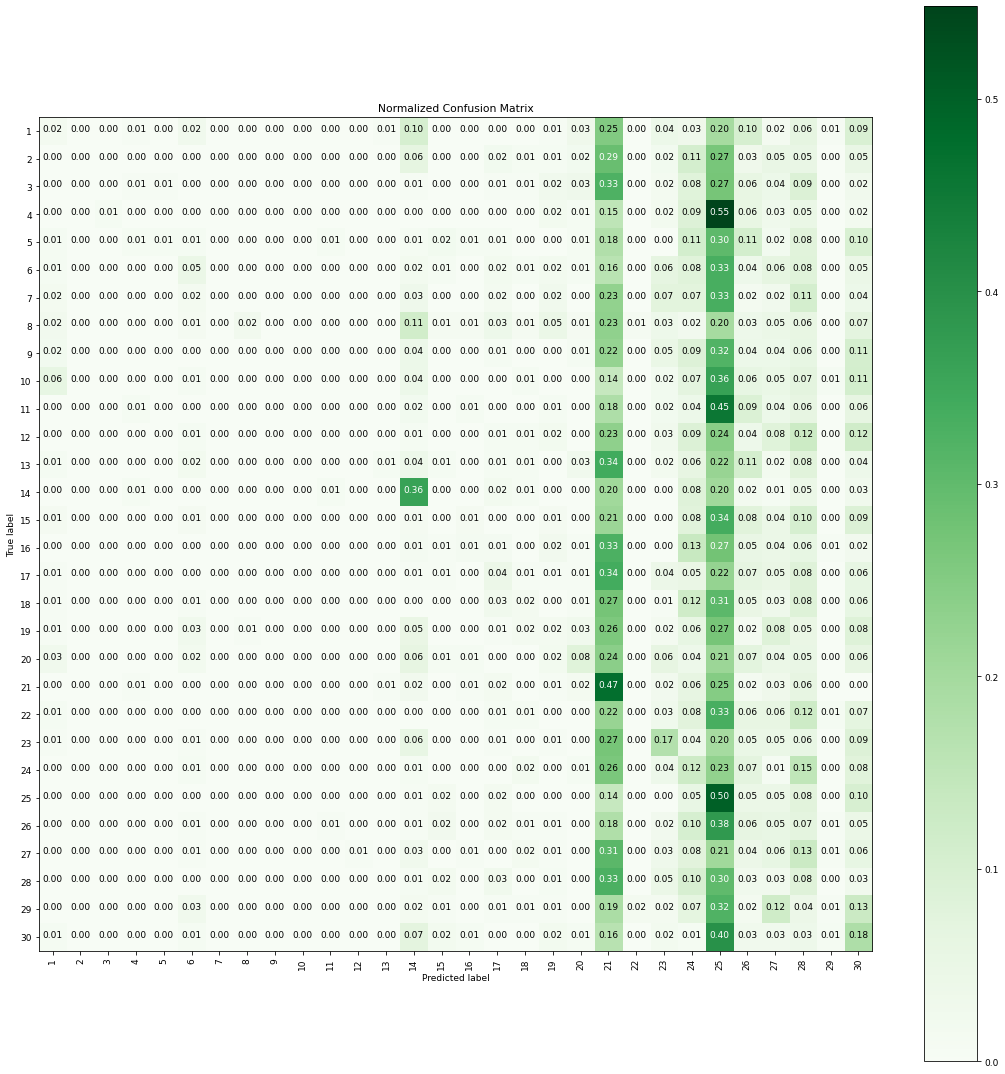


 F1 Score:0.05200120594165525
------
f1: *0.05200120594165525
------


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.08434782608695653




As epsilon = 1.5
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:38.408016

Predicting test data
==> testing time:- 0:00:00.051510

==> Accuracy:- 0.09061488673139159


 ********Confusion Matrix********

 [[ 7  0  0  0  0  2  0  0  0  0  0  0  0  9  0  0  2  1  6  6 28  0  3  4
  16  8  4 15  0 16]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  4  3  0  0  1  2  1 25  0  3  7
  24  6  6  8  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  1  0  0  1 35  0  6  9
  30  4  3 23  2  6]
 [ 1  0  1  0  0  0  0  0  0  0  0  0

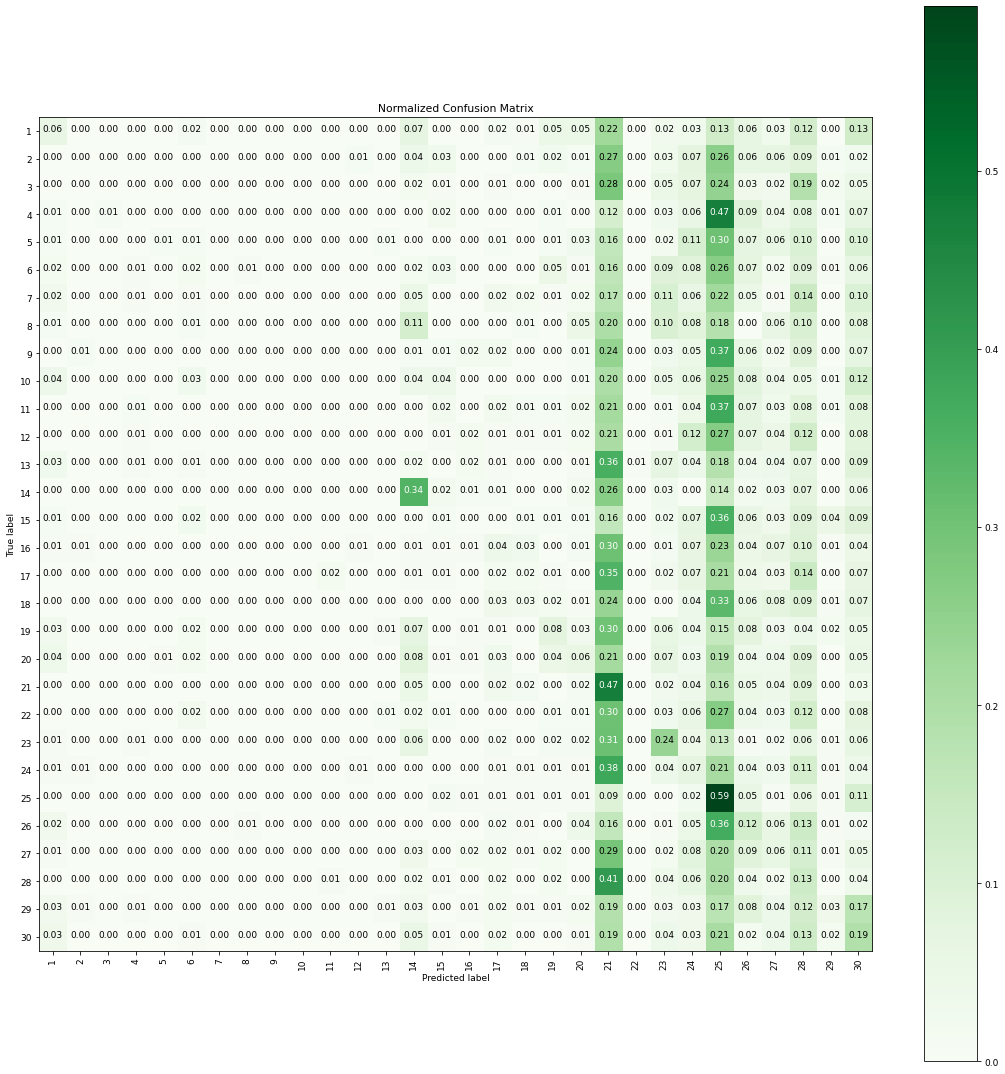


 F1 Score:0.05593907556176566
------
f1: *0.05593907556176566
------


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=180)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 180}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.08159420289855072




As epsilon = 1.6
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:34.204897

Predicting test data
==> testing time:- 0:00:00.046228

==> Accuracy:- 0.07766990291262135


 ********Confusion Matrix********

 [[ 8  0  1  0  0  1  0  0  0  0  1  0  2 11  2  1  4  0  6  5 22  0  9 10
  15  4  8 10  1  6]
 [ 2  1  1  2  0  1  0  1  0  0  0  0  1  2  3  0  4  2  3  3 22  0  4  6
  15  7  3  4  3  4]
 [ 1  0  0  0  2  1  0  0  0  0  0  2  1  5  4  1  2  2  2  2 30  0  7  5
  21  4 12 11  2  6]
 [ 1  0  1  4  1  1  0  0  0  0  0  1

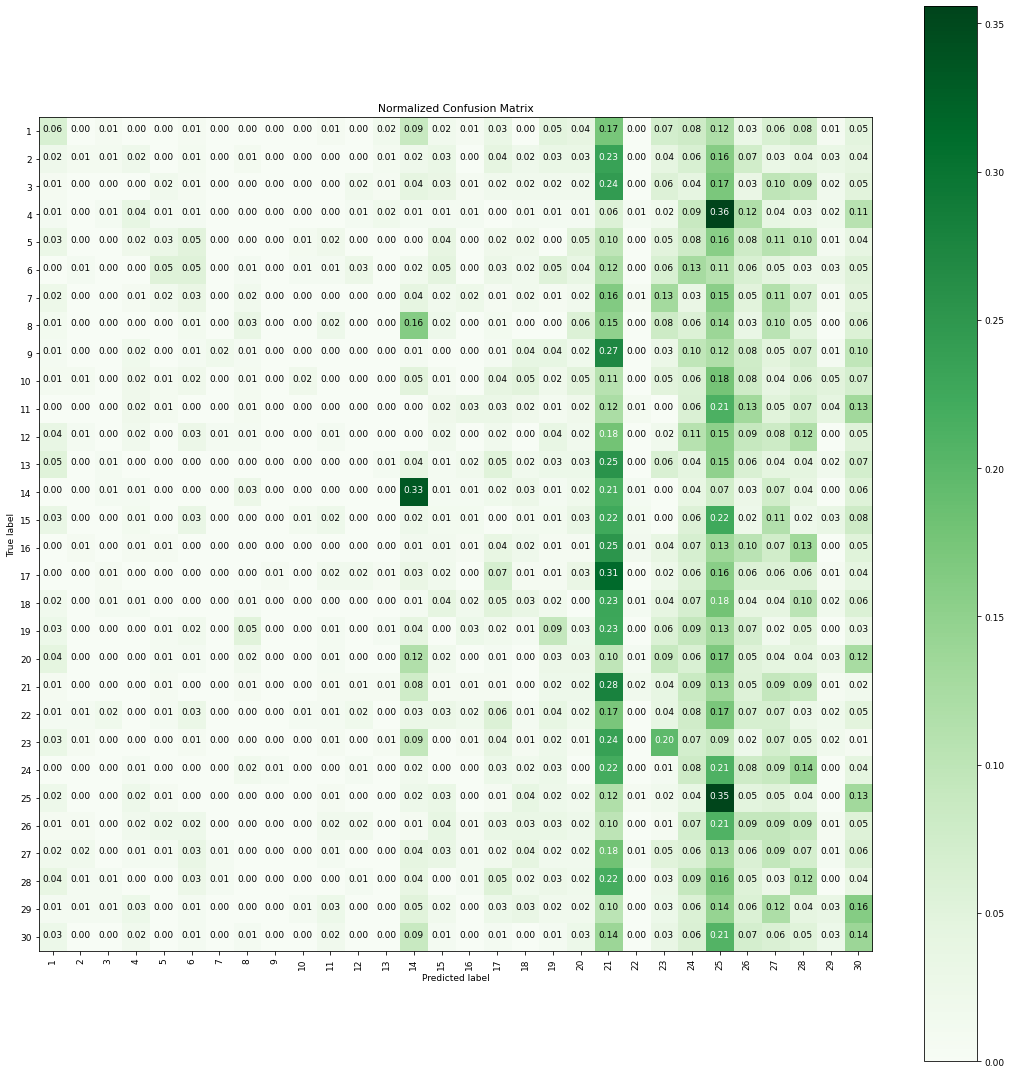


 F1 Score:0.05808719304330429
------
f1: *0.05808719304330429
------


==> Best Estimator:
	RandomForestClassifier(max_depth=9, n_estimators=140)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9, 'n_estimators': 140}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.08956521739130434




As epsilon = 1.7
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:33.036497

Predicting test data
==> testing time:- 0:00:00.089235

==> Accuracy:- 0.09855839952927331


 ********Confusion Matrix********

 [[15  1  3  0  2  3  0  2  0  0  1  0  0  6  5  2  8  2  0  5  7  0 10  3
   9  6 10 12  3 12]
 [ 1  1  1  1  0  1  0  1  0  1  1  0  1  4  4  1  2  1  0  3 11  5  6  8
  10 11  4  8  3  4]
 [ 1  0  3  2  1  1  0  0  0  1  2  4  3  0  3  1  9  5  3  2 10  0  5 10
  14  9  8 17  2  7]
 [ 1  0  1  3  2  3  0  0  0  0  3  0

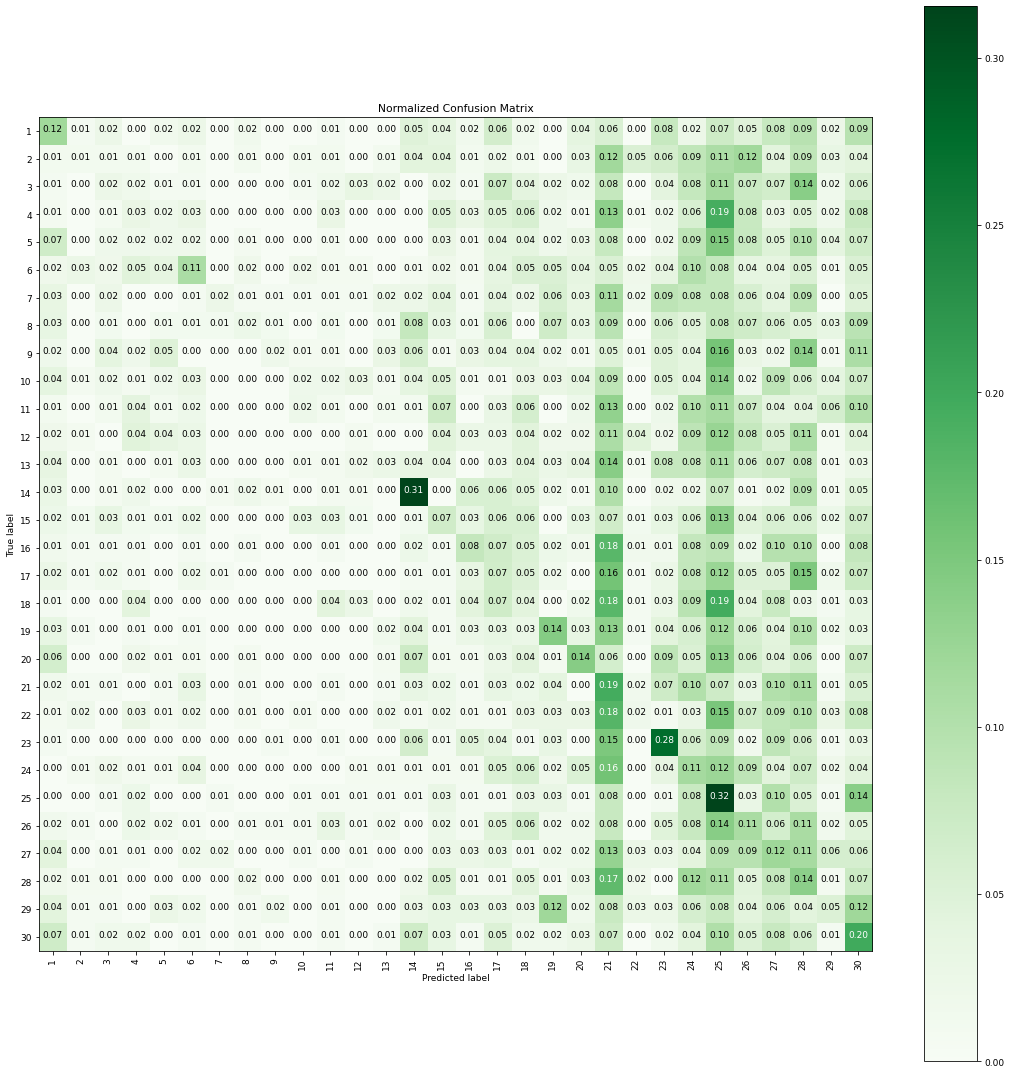


 F1 Score:0.08506410970820956
------
f1: *0.08506410970820956
------


==> Best Estimator:
	RandomForestClassifier(max_depth=15, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 15, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.09927536231884057




As epsilon = 1.8
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:26:12.823423

Predicting test data
==> testing time:- 0:00:00.075330

==> Accuracy:- 0.11268020005884083


 ********Confusion Matrix********

 [[15  0  0  0  0  0  0  0  0  2  0  0  0  6  3  3  5  1  4  4 24  0  9  5
   7  7 16  3  0 13]
 [ 3  1  0  2  0  2  0  0  0  0  0  0  0  4  3  0  4  0  2  4 17  1  4  3
  21  3  6  4  1  9]
 [ 1  0  1  0  0  0  0  1  0  0  2  1  2  0  0  3  8  1  0  2 26  0  2  9
  29 10  5 13  0  7]
 [ 0  0  0  5  0  0  0  0  0  1  1 


 F1 Score:0.08658813535404984
------
f1: *0.08658813535404984
------


==> Best Estimator:
	RandomForestClassifier(max_depth=9, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.10246376811594202




As epsilon = 1.9
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:05:31.951878

Predicting test data
==> testing time:- 0:00:00.065258

==> Accuracy:- 0.10267725801706384


 ********Confusion Matrix********

 [[21  0  0  1  0  2  0  3  0  1  2  0  1  6  1  2  5  1  3  2 13  1 12  2
  13  5 11  7  1 11]
 [ 1  1  1  1  2  3  1  1  0  2  1  0  1  2  1  2  4  2  2  3 11  0  7  5
  18  7  7  3  0  5]
 [ 5  1  3  1  1  1  0  1  0  0  0  0  1  2  3  2  7  5  2  2 19  0  0  9
  21  2  7 22  3  3]
 [ 0  0  0  8  2  0  0  0  0  0  2  0

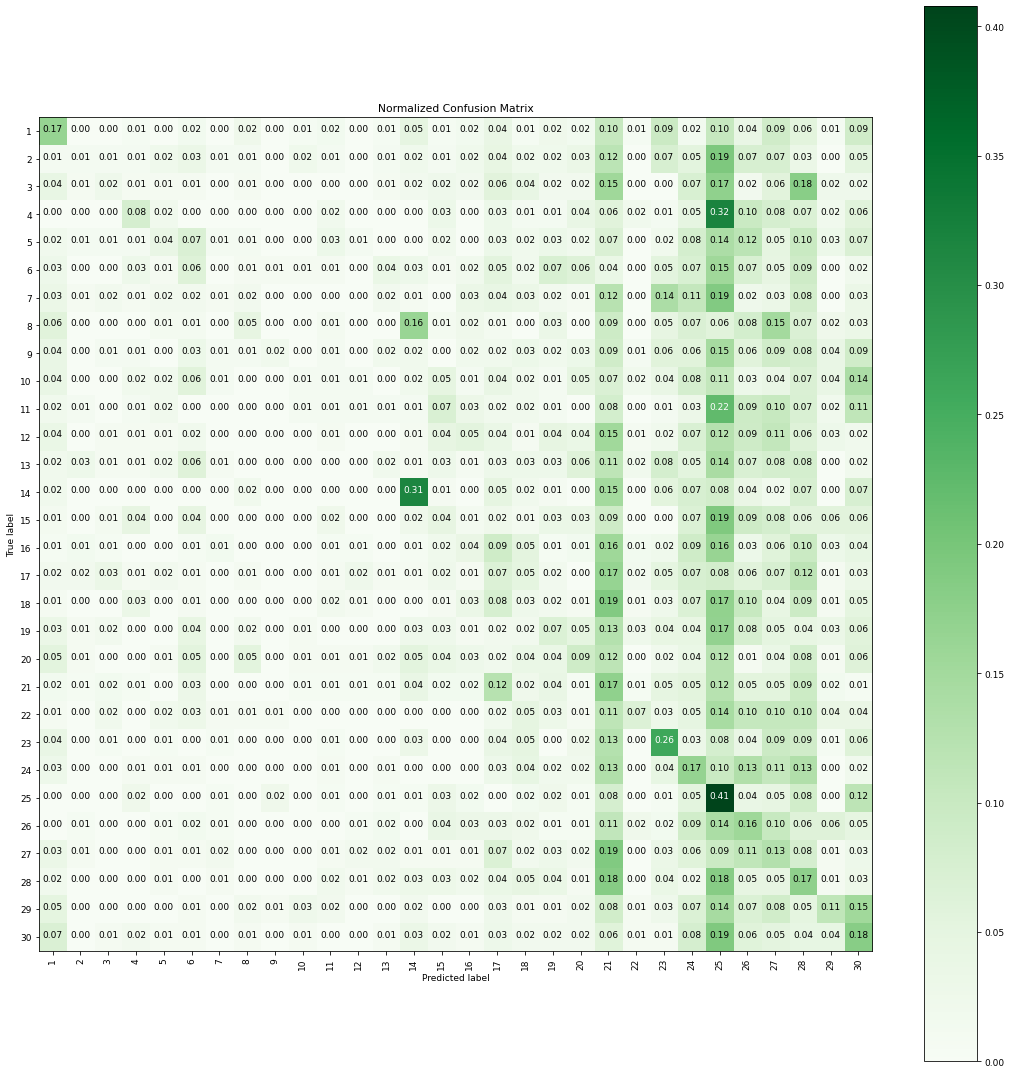


 F1 Score:0.08750461267461461
------
f1: *0.08750461267461461
------


==> Best Estimator:
	RandomForestClassifier(max_depth=12, n_estimators=160)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 12, 'n_estimators': 160}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.10695652173913044




As epsilon = 2.0
training the model...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Done
==> training time:- 0:06:01.127958

Predicting test data
==> testing time:- 0:00:00.082314

==> Accuracy:- 0.12121212121212122


 ********Confusion Matrix********

 [[19  0  2  0  0  2  0  1  0  0  1  1  2  9  2  0  3  2  1  5  8  1  9  4
  10  9 14  7  1 14]
 [ 2  2  3  1  2  2  0  2  0  0  3  1  0  2  0  1  1  2  3  3 14  0  0  8
  16  5  3  7  2  9]
 [ 1  1  2  0  1  1  0  2  2  0  1  0  1  0  5  0  4  4  3  0 20  0  2 10
  17  5  8 20  2 11]
 [ 0  1  3  4  4  2  0  0  0  0  2 

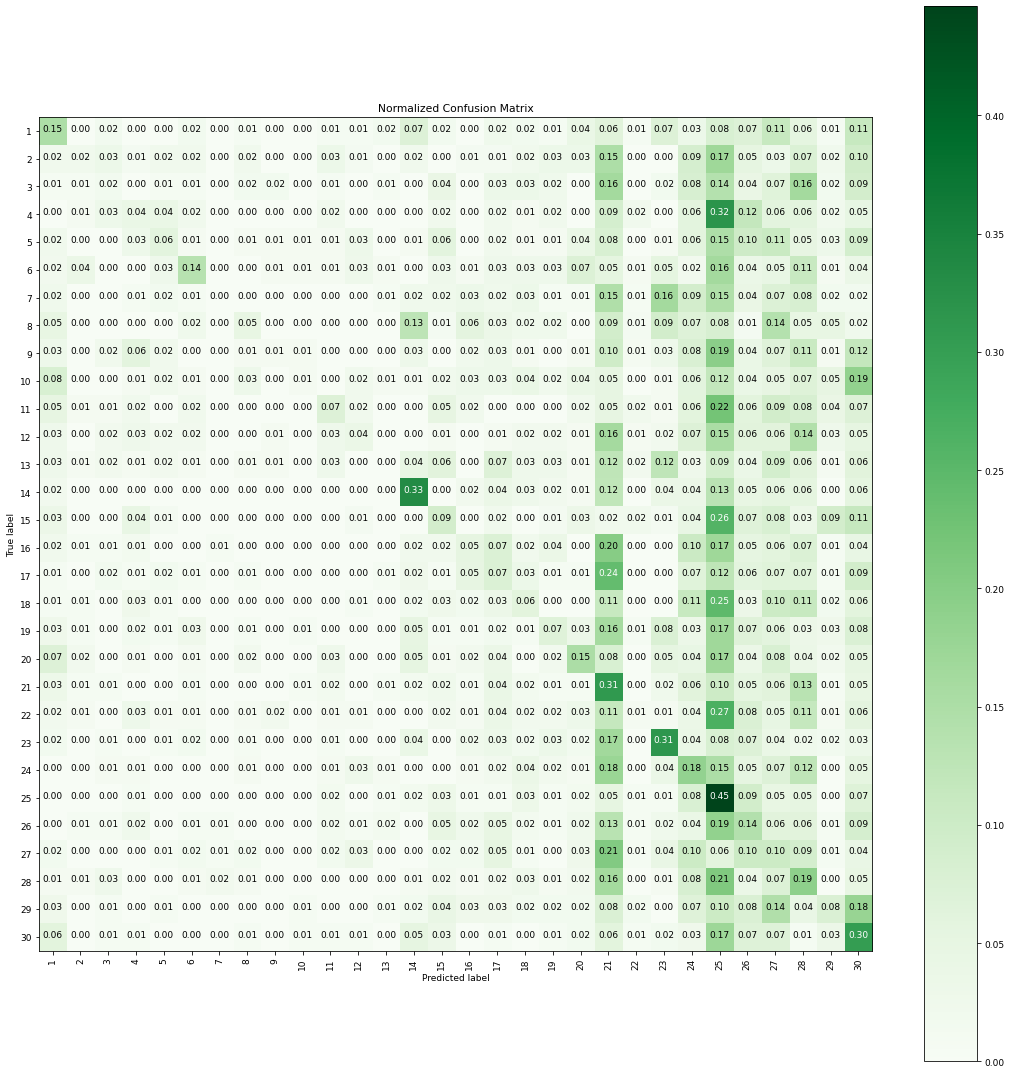


 F1 Score:0.10200834374568318
------
f1: *0.10200834374568318
------


==> Best Estimator:
	RandomForestClassifier(max_depth=12, n_estimators=200)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 12, 'n_estimators': 200}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.11507246376811593






ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

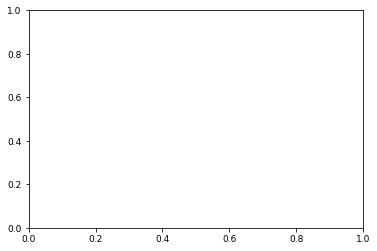

In [15]:
import warnings
# 収束しなかった場合のwarning
from sklearn.exceptions import ConvergenceWarning
# warningを無視する
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

epsilons = [1.0, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
f1_array_random = [f1]


for epsilon in epsilons:
    # epsilon = 0.1
    # default sensitivity = 1.0
    
    print("As epsilon = {}".format(epsilon))

    X_train_noise = X_train.copy()
    X_test_noise = X_test.copy()

    X_train_noise_array = X_train_noise.values
    X_test_noise_array = X_test_noise.values

    for i in range(len(X_train_noise_array)):
        X_train_noise_array[i] = X_train_noise_array[i] + np.random.laplace(0, 1.0/epsilon, X_train_noise_array[i].shape)
    for j in range(len(X_test_noise_array)):
        X_test_noise_array[j] = X_test_noise_array[j] + np.random.laplace(0, 1.0/epsilon, X_test_noise_array[j].shape)
    
    params = {'n_estimators': np.arange(100,201,20), 'max_depth':np.arange(3,16,3)}
    rfc = RandomForestClassifier()
    rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1, cv=5, verbose=1)
    rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train_noise_array, y_train, X_test_noise_array, y_test, class_labels=labels)
    
    f1_array_random.append(f1)
    print('------')
    print('f1: *'+str(f1))
    print('------')

    # observe the attributes of the model 
    print_grid_search_attributes(rfc_grid_results['model'])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_random, label='Random Forest in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()

print(f1_array_random)


In [16]:
# epsilons = [1.0, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
print(f1_array_random)

[0.8347058944393726, 0.03254801957888889, 0.04500024480707307, 0.05200120594165525, 0.05593907556176566, 0.05808719304330429, 0.08506410970820956, 0.08658813535404984, 0.08750461267461461, 0.10200834374568318]


As epsilon = 6
training the model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Done
==> training time:- 0:19:52.969970

Predicting test data
==> testing time:- 0:00:01.033306

==> Accuracy:- 0.4524860253015593


 ********Confusion Matrix********

 [[62  0  0  0  1  0  0  0  0  0  2  0  0  0  5  1  5  1  3  0  2  0  0  2
   9  5 11  1 15  2]
 [ 0 24  1  8  2  3  0  1  0  0  2  0  0  0  1  2  1  2  7  3 11  0  0  1
   6  5  7  2  5  0]
 [ 0  0 39  3  2  0  0  0  1  0  2  3  0  0  5  1  4  5  5  3  3  3  1  8
   7  4  2 14  5  3]
 [ 0  0  0 60  0  4  0  0  0  1  2  0  0  0  1  1  0  0  3  7  0  0  0  3
  13  4  2  2  0  1]
 [ 0  0  1  9 48  7  0  0  0  0  4  2  0  0  4  3  0  0  2  1  1  0  0  1
   6  5  5  2  1  0]
 [ 3  1  0  4  6 53  0  0  0  0  2  3  1  0  2  1  1  1  4  5  8  0  0  3
   4  2  0  5  1  1]
 [ 1  0  1  5  2  3 35  0  0  0  2  1  0  1  0  4  3  4  1  2  7  0 13  6
   8  5  8  9  1  1]
 [ 6  0  0  0  1  0  1 27  1  0  4  0  0  0  1  2  7  0  7  3  4  1


 F1 Score:0.4486299781286202


==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=190)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 190}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.4339130434782609
As epsilon = 7
training the model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Done
==> training time:- 0:33:59.108745

Predicting test data
==> testing time:- 0:00:00.782970

==> Accuracy:- 0.4916151809355693


 ********Confusion Matrix********

 [[66  0  1  0  0  0  0  0  1  0  2  0  0  0  3  0  5  3  5  0  3  0  0  0
   6  6 10  2 14  0]
 [ 1 40  1  2  1  0  0  0  0  1  0  0  0  0  0  0  4  0  6  3  5  3  0  0
   2 14  6  3  1  1]
 [ 0  0 37  1  0  1  0  0  0  1  5  3  0  0  2  1  3  5  6  3  8  2  1  7
   8  5  4 13  5  2]
 [ 0  0  1 69  0  1  0  0  0  0  3  1  0  0  0  0  0  0  7  5  0  0  0  2
   7  5  


 F1 Score:0.49368599934273916


==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=170)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 170}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.4763768115942029
As epsilon = 8
training the model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Done
==> training time:- 0:24:36.197519

Predicting test data
==> testing time:- 0:00:00.666252

==> Accuracy:- 0.5254486613709914


 ********Confusion Matrix********

 [[ 67   1   0   0   0   0   0   0   1   0   3   0   0   0   3   0   2   1
    2   1   2   0   0   1   6   5  11   1  20   0]
 [  0  39   0   3   0   2   0   1   0   1   1   0   0   0   0   0   2   1
    5   4   7   2   1   0   6   9   4   3   3   0]
 [  0   0  47   0   0   3   0   0   1   0   2   1   0   1   1   2   3   3
    4   5   3   1   0   7   8   6   5   9  


 F1 Score:0.5280462877562933


==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=190)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 190}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.5171014492753623
As epsilon = 9
training the model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Done
==> training time:- 2:01:29.528155

Predicting test data
==> testing time:- 0:00:00.848478

==> Accuracy:- 0.5483965872315387


 ********Confusion Matrix********

 [[ 67   0   0   0   0   0   1   0   0   0   2   0   0   0   3   0   7   0
    3   3   0   0   0   0   5   5   9   1  21   0]
 [  0  43   0   4   0   2   0   0   0   2   0   0   0   0   1   0   2   0
    5   5   5   1   0   3   6   3   8   1   2   1]
 [  0   1  49   4   1   2   0   0   1   1   1   2   0   0   1   1   4   3
    5   3   1   2   0   2   6   3   3  15   

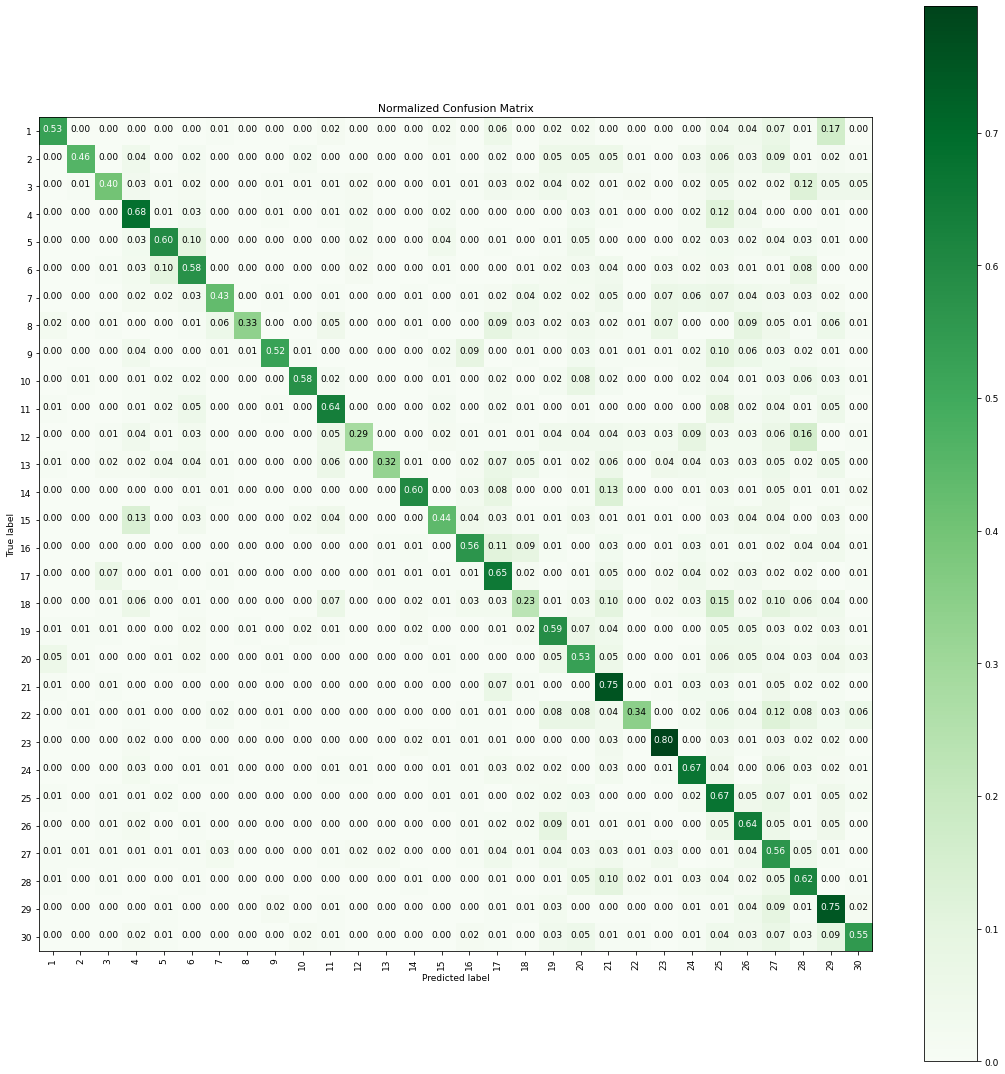


 F1 Score:0.5507645821310166


==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=190)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 190}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.541304347826087
As epsilon = 10
training the model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Done
==> training time:- 0:25:02.140145

Predicting test data
==> testing time:- 0:00:00.863139

==> Accuracy:- 0.5766401882906738


 ********Confusion Matrix********

 [[ 67   0   0   0   0   0   0   0   1   0   2   0   0   0   3   0   5   2
    2   0   1   0   0   0   6   4  10   4  19   1]
 [  0  50   2   1   1   0   0   1   0   0   0   0   0   0   0   0   0   1
    9   5   6   1   0   1   2   6   5   0   3   0]
 [  0   0  53   0   0   4   0   0   3   0   2   0   0   0   3   1   4   1
    3  10   2   2   0   3   6   3   4  11   


 F1 Score:0.5797843521767483


==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=190)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 190}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.5621739130434782


ValueError: x and y must have same first dimension, but have shapes (17,) and (5,)

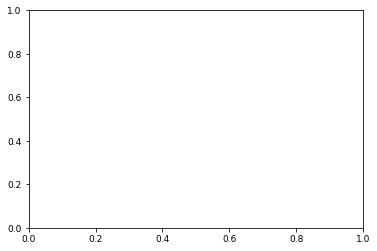

In [56]:
import warnings
# 収束しなかった場合のwarning
from sklearn.exceptions import ConvergenceWarning
# warningを無視する
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

epsilons = [6, 7, 8, 9, 10]
f1_array_random = list()


for epsilon in epsilons:
    # epsilon = 0.1
    # default sensitivity = 1.0
    
    print("As epsilon = {}".format(epsilon))

    X_train_noise = X_train.copy()
    X_test_noise = X_test.copy()

    X_train_noise_array = X_train_noise.values
    X_test_noise_array = X_test_noise.values

    for i in range(len(X_train_noise_array)):
        X_train_noise_array[i] = X_train_noise_array[i] + np.random.laplace(0, 1.0/epsilon, X_train_noise_array[i].shape)
    for j in range(len(X_test_noise_array)):
        X_test_noise_array[j] = X_test_noise_array[j] + np.random.laplace(0, 1.0/epsilon, X_test_noise_array[j].shape)
    
    params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
    rfc = RandomForestClassifier()
    rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1, cv=5, verbose=1)
    rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train_noise_array, y_train, X_test_noise_array, y_test, class_labels=labels)
    
    f1_array_random.append(f1)

    # observe the attributes of the model 
    print_grid_search_attributes(rfc_grid_results['model'])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 4, 5] + epsilons, f1_array_random, label='Random Forest in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()


## 6. Gradient Boosted Decision Trees With GridSearch

## 7. PATE
[参考URL](https://github.com/gmodena/tinydp)

sensitivity : 1.0 固定


As epsilon = 0.01
training the model...
Done
==> training time:- 0:00:46.295815

Predicting test data
==> testing time:- 0:00:00.512278

==> Accuracy:- 0.05707561047366873


 ********Confusion Matrix********

 [[26 22  2  3  3  3  5  4  2  3  4  3  1  4  3  3  2  3  1  4  1  5  2  3
   3  6  4  2  0  0]
 [ 9  9  7  4  2  3  3  6  1  6  2  6  3  4  3  3  3  1  0  2  1  3  3  3
   1  1  1  3  1  0]
 [ 4  9 10  6  2  3  2  2  7 12  3  4  5  4  1  5  1  7  7  4  3  3  3  1
   3  5  4  1  1  1]
 [ 8  6  5 10  3  2  5  6  4  4  7  1  4  5  3  1  2  2  2  1  5  3  1  6
   2  3  0  0  2  1]
 [ 9  4  7  5  7  4  2  5  3  5  6  5  4  1  3  4  1  7  3  1  1  2  2  7
   2  1  0  1  0  0]
 [ 4  4  3  6  5  5  8  9  4  7  3  7  4  5  2  4  2  3  2  6  7  5  3  0
   1  0  1  1  0  0]
 [ 4  4  8  6  2  2  7  6  1  2  3  5  7  5  6  6  3  4 10  2  5  5  6  3
   2  4  0  2  2  1]
 [ 3  4  2  7  5  5  5  4  4  4  2  3  5  6  1  1  2  1  3  1  6  1  1  3
   4  4  0  0  0  0]
 [ 1  4  8  4  3  1  5  9  8  


 F1 Score:0.05627851224778505
As epsilon = 0.05
training the model...
Done
==> training time:- 0:00:21.663434

Predicting test data
==> testing time:- 0:00:00.800294

==> Accuracy:- 0.06796116504854369


 ********Confusion Matrix********

 [[32 17  2  2  3  3  5  4  3  3  4  3  1  4  2  3  2  3  1  4  1  5  2  3
   3  6  4  2  0  0]
 [ 9  9  7  4  2  3  4  6  1  6  2  6  4  5  2  3  3  1  0  2  1  3  2  3
   1  1  0  3  1  0]
 [ 4 10 12  6  2  3  2  2  6 11  3  4  5  3  1  6  1  8  7  4  2  3  2  1
   3  5  4  1  1  1]
 [ 8  5  5 12  3  3  5  6  4  4  6  1  4  4  3  1  2  3  2  1  5  3  1  6
   2  2  0  0  2  1]
 [ 8  4  7  4  9  4  2  5  3  5  6  5  4  1  3  4  1  7  3  1  1  2  2  7
   2  1  0  1  0  0]
 [ 4  3  2  6  5  8  8  9  4  7  3  7  4  5  2  4  1  3  2  6  7  5  3  0
   1  0  1  1  0  0]
 [ 4  4  8  6  2  2  8  6  1  2  2  5  7  5  6  6  3  4 10  2  5  5  6  3
   2  4  0  2  2  1]
 [ 4  4  2  8  5  5  4  4  4  4  2  3  5  6  1  1  2  1  3  1  5  1  1  3
   4  4  0  0  0  0]

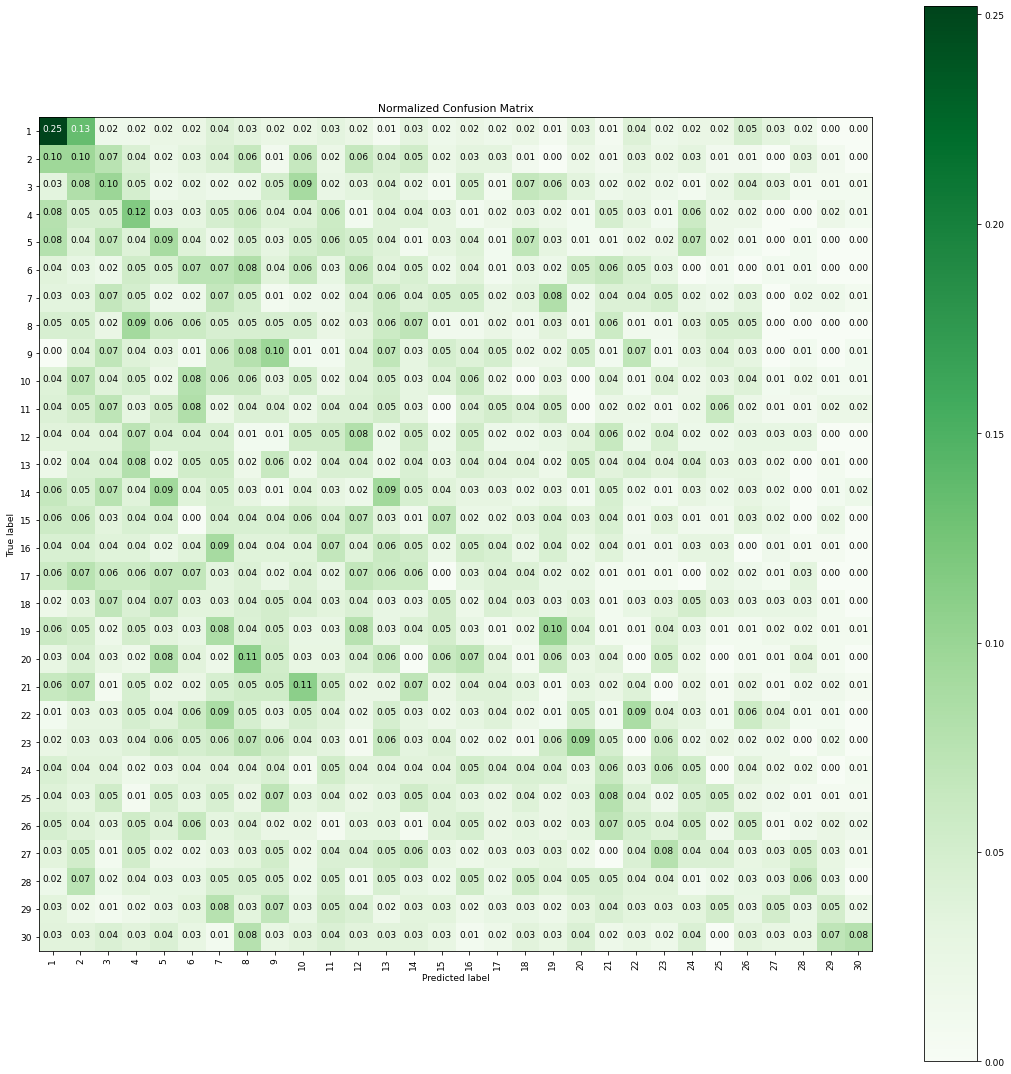


 F1 Score:0.06735832696440126
As epsilon = 0.1
training the model...
Done
==> training time:- 0:00:25.221942

Predicting test data
==> testing time:- 0:00:00.802407

==> Accuracy:- 0.088261253309797


 ********Confusion Matrix********

 [[36 13  2  1  3  3  5  4  4  3  5  3  1  4  2  3  2  3  1  3  1  5  2  3
   3  6  4  2  0  0]
 [ 7 11  7  4  2  3  4  6  1  6  2  6  4  5  2  3  3  1  0  2  1  3  2  3
   1  1  0  3  1  0]
 [ 4  9 14  6  2  3  2  2  6 10  3  4  5  3  1  6  1  8  7  4  2  3  2  1
   3  5  4  1  1  1]
 [ 6  5  6 16  3  3  4  6  4  4  6  0  4  4  3  0  2  3  2  1  5  3  1  6
   2  2  0  0  2  1]
 [ 7  4  6  5 12  3  2  5  2  5  6  5  4  1  3  4  1  7  3  1  1  2  2  7
   2  1  0  1  0  0]
 [ 4  3  2  5  6 11  8  9  4  7  3  6  4  4  1  4  1  3  2  6  7  5  3  0
   1  0  1  1  0  0]
 [ 4  4  8  6  2  2 10  6  1  3  2  5  8  5  6  7  3  4  7  1  6  4  6  2
   2  4  0  2  2  1]
 [ 5  4  2  8  5  5  4  5  4  3  2  3  4  7  1  1  2  1  3  1  5  1  1  3
   3  4  0  0  0  0]
 [

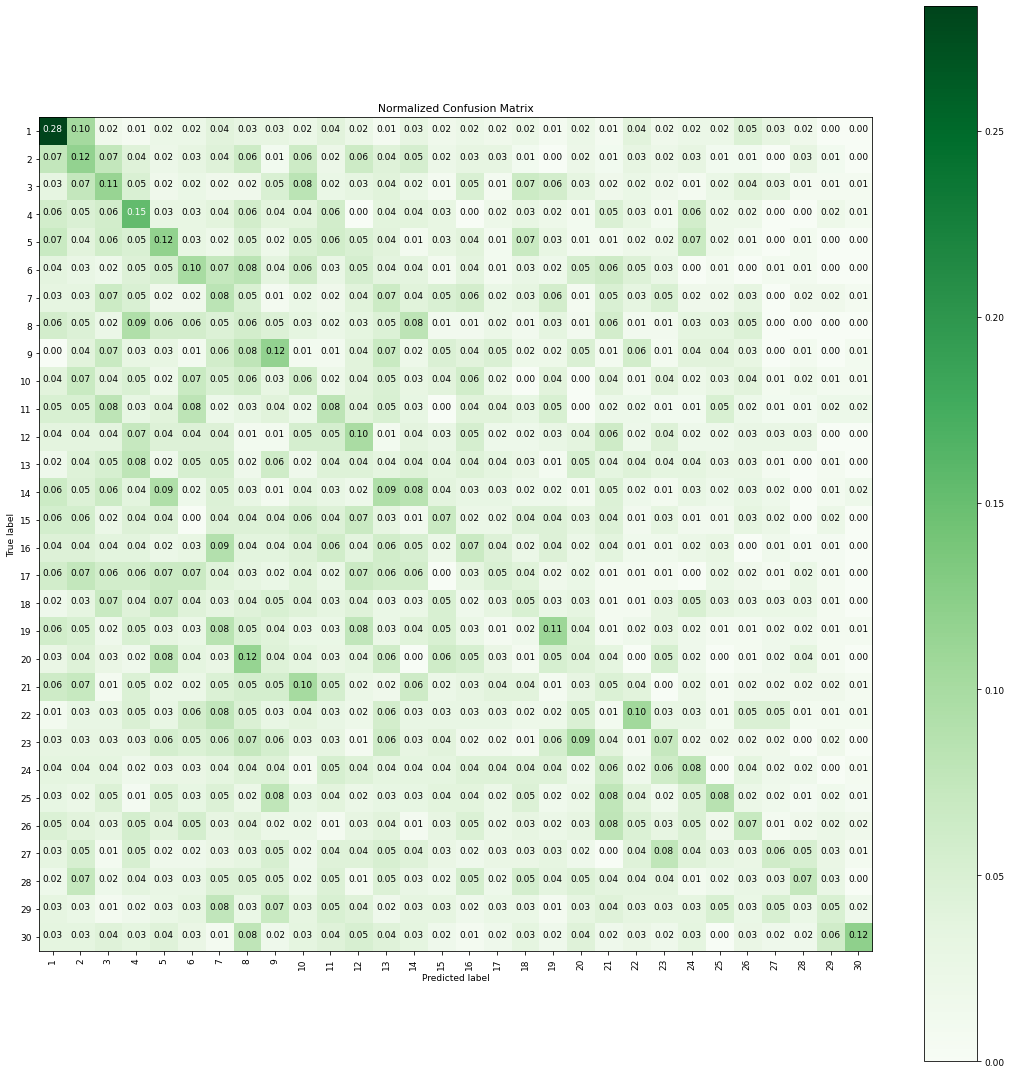


 F1 Score:0.08797405079496676
As epsilon = 0.3
training the model...
Done
==> training time:- 0:12:30.181366

Predicting test data
==> testing time:- 0:00:05.071324

==> Accuracy:- 0.18770226537216828


 ********Confusion Matrix********

 [[49 12  3  0  3  3  3  3  3  2  5  2  0  2  1  3  2  3  1  2  1  5  1  3
   2  5  4  3  1  0]
 [ 6 23  7  2  2  3  2  4  1  6  1  3  4  4  2  2  3  1  1  1  2  3  2  3
   1  1  0  3  1  0]
 [ 5  9 21  6  2  3  1  2  5 10  3  2  4  2  2  5  0  8  7  2  2  3  2  2
   3  5  3  2  1  1]
 [ 3  2  3 36  3  2  4  6  4  3  3  0  5  1  3  0  1  1  2  1  5  3  1  6
   1  2  0  0  2  1]
 [ 6  3  3  3 26  3  2  4  2  4  4  5  4  1  4  4  2  7  3  0  0  2  1  5
   1  2  0  1  0  0]
 [ 3  3  1  2  8 26  6  7  4  5  2  5  1  3  1  4  1  2  1  6  7  5  3  2
   1  0  1  1  0  0]
 [ 3  4  8  6  3  3 23  6  1  4  3  2  7  5  4  6  3  1  5  1  5  3  5  2
   2  5  0  1  1  1]
 [ 8  2  2  9  4  5  4 10  3  3  2  2  5  6  0  1  2  0  4  1  4  1  0  2
   2  4  0  1  0  0]


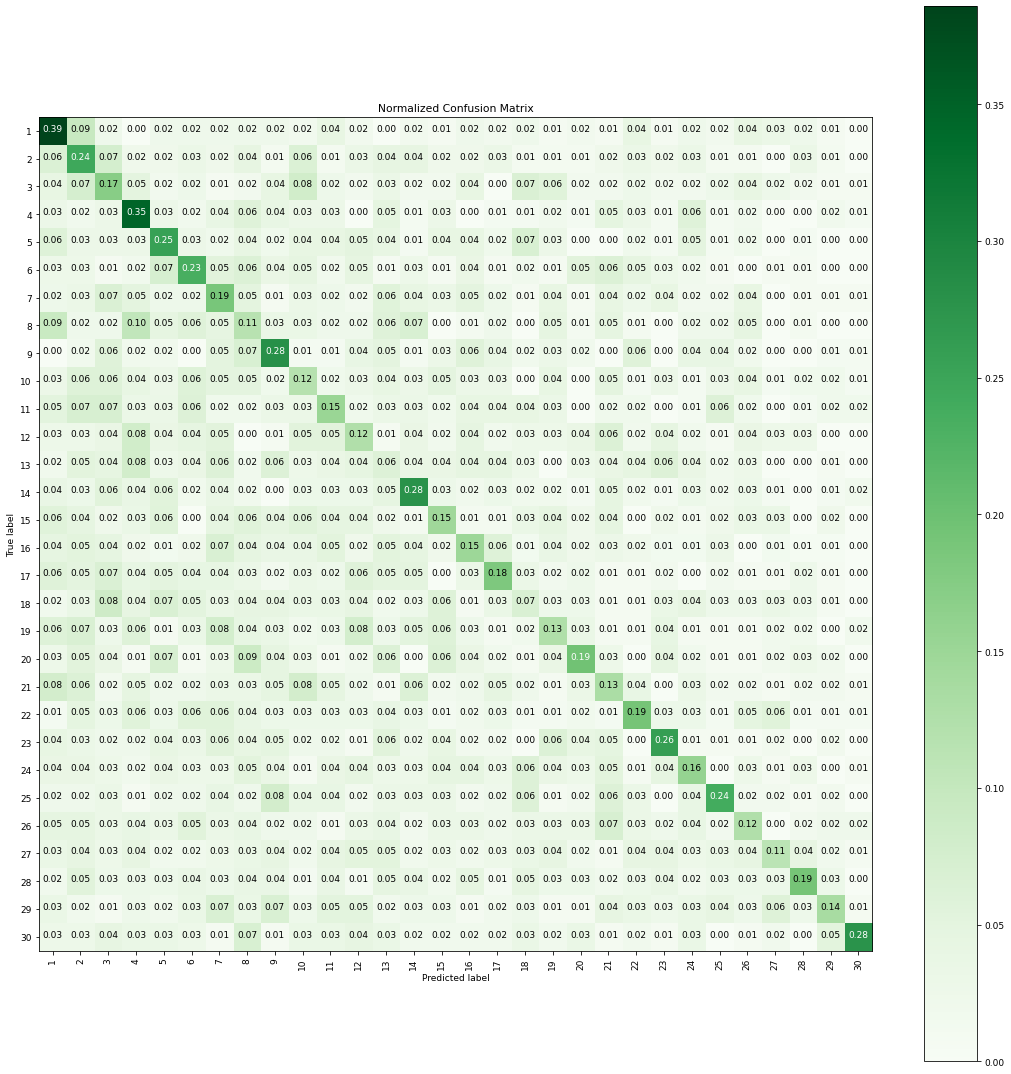


 F1 Score:0.18747816061434638
As epsilon = 0.5
training the model...
Done
==> training time:- 0:14:03.284830

Predicting test data
==> testing time:- 0:00:03.676998

==> Accuracy:- 0.32068255369226245


 ********Confusion Matrix********

 [[63  6  2  0  2  2  2  1  3  1  3  4  0  1  0  2  1  2  2  2  1  5  1  3
   4  5  3  4  2  0]
 [ 5 34  5  1  3  1  1  4  0  5  1  3  3  2  2  2  2  0  1  1  3  3  2  2
   2  1  1  3  1  0]
 [ 5 10 30  6  0  3  1  2  4  7  3  1  4  3  2  3  1  7  5  3  1  3  2  3
   2  5  4  3  0  0]
 [ 3  2  3 56  3  2  2  6  4  2  2  1  4  0  1  0  0  1  1  1  3  2  0  3
   1  0  0  0  0  1]
 [ 4  3  3  4 32  3  2  3  2  3  3  6  4  1  5  2  2  6  3  0  0  2  1  4
   1  3  0  0  0  0]
 [ 3  2  2  1  8 38  6  8  1  3  1  4  1  2  1  3  1  3  1  5  4  3  2  4
   1  1  1  1  0  0]
 [ 2  4  7  6  3  2 37  5  0  2  2  2  6  4  1  7  3  0  5  1  1  4  5  4
   2  4  0  2  1  1]
 [10  1  1  6  4  2  5 17  2  4  2  2  5  4  2  1  2  0  4  1  4  1  0  1
   2  3  0  1  0  0]


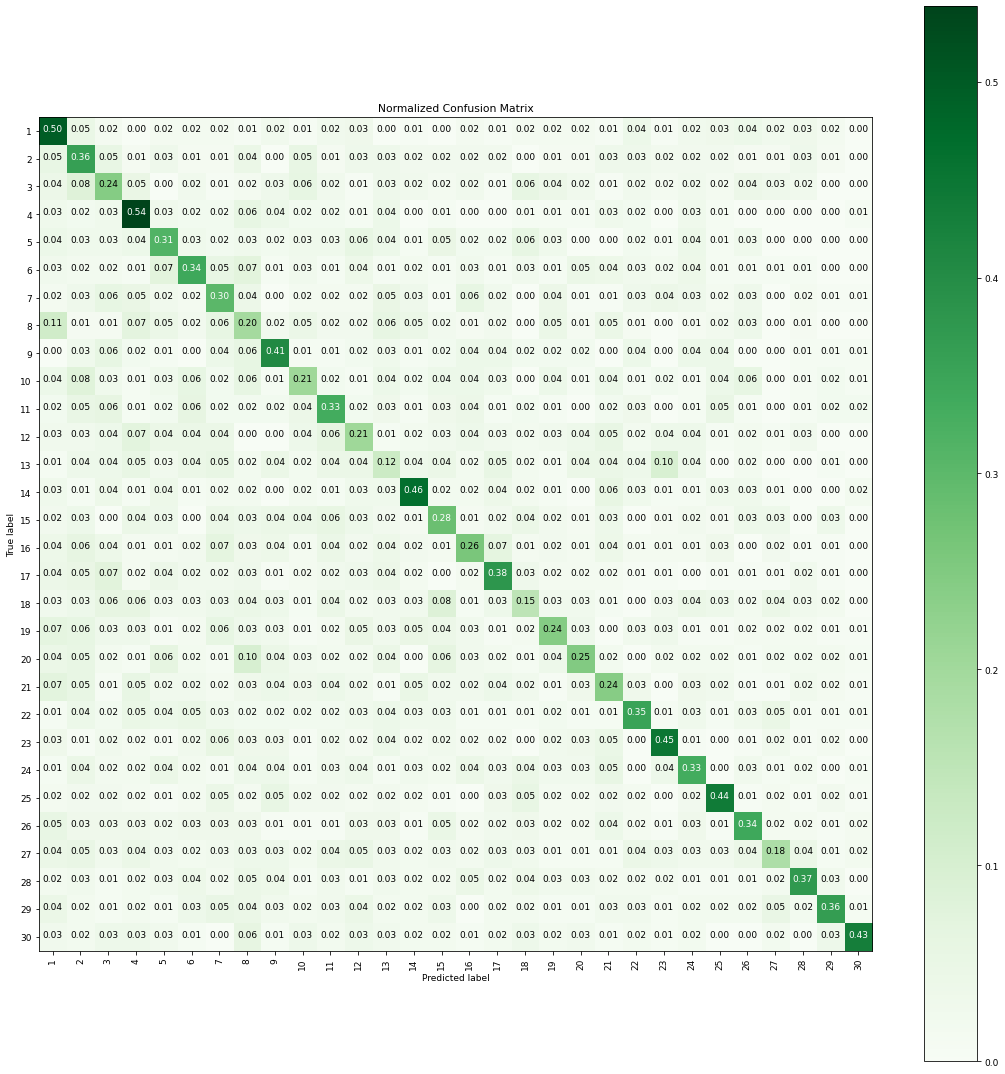


 F1 Score:0.31922053860869526
As epsilon = 1.0
training the model...
Done
==> training time:- 0:12:50.840174

Predicting test data
==> testing time:- 0:00:03.234806

==> Accuracy:- 0.502206531332745


 ********Confusion Matrix********

 [[69  6  2  0  2  0  1  3  2  1  2  3  0  0  0  2  0  2  3  1  0  6  0  2
   4  4  7  1  3  1]
 [ 4 50  2  1  2  1  0  2  0  3  0  2  0  1  1  1  2  1  1  1  2  6  1  1
   1  1  2  4  1  0]
 [ 3  6 50  4  0  4  1  1  3  4  1  3  3  3  4  2  2  6  1  4  1  3  1  3
   1  4  1  3  1  0]
 [ 0  1  3 74  3  0  0  3  2  0  0  1  4  0  2  0  0  0  1  1  0  2  0  2
   5  0  0  0  0  0]
 [ 2  1  5  3 57  3  1  2  2  1  2  6  1  0  4  0  1  3  1  1  0  0  0  2
   1  3  0  0  0  0]
 [ 1  1  1  2  9 60  3  0  1  2  1  3  2  1  1  2  2  2  1  4  1  1  2  3
   1  2  1  1  0  0]
 [ 2  2  5  3  3  1 56  2  1  1  2  1  3  2  0  4  6  0  3  0  1  3  1  5
   5  5  1  3  1  1]
 [11  0  0  3  4  0  5 30  2  4  5  3  3  1  1  1  1  0  1  0  4  1  0  0
   1  1  2  1  2  0]
 [


 F1 Score:0.49865425801220287
As epsilon = 1.5
training the model...
Done
==> training time:- 0:12:45.219809

Predicting test data
==> testing time:- 0:00:03.803315

==> Accuracy:- 0.5539864666078258


 ********Confusion Matrix********

 [[74  6  2  0  2  0  1  3  2  0  4  1  0  0  0  1  0  3  1  1  0  3  0  1
   3  4  7  1  6  1]
 [ 3 52  2  0  1  1  0  1  0  5  0  1  1  0  1  1  2  1  1  2  3  6  1  1
   1  1  1  3  2  0]
 [ 2  4 56  2  0  5  0  0  1  3  2  4  3  1  4  1  2  7  1  4  1  2  1  3
   2  3  2  4  1  2]
 [ 0  1  5 75  2  0  0  2  2  0  0  1  2  0  2  0  0  1  0  1  0  1  0  2
   6  0  1  0  0  0]
 [ 1  1  3  3 66  1  0  0  2  1  1  5  0  0  4  0  1  2  0  2  0  0  0  4
   1  3  1  0  0  0]
 [ 0  1  1  3  9 67  1  0  1  2  1  2  2  0  1  2  1  2  1  4  1  1  1  4
   0  1  0  1  0  1]
 [ 2  2  4  2  2  1 63  3  3  0  1  1  4  3  0  3  4  0  0  0  1  1  0  5
   7  5  1  3  1  1]
 [11  0  0  2  3  0  4 31  1  4  6  2  3  2  2  0  1  0  1  0  2  0  1  0
   1  2  4  1  2  1]
 

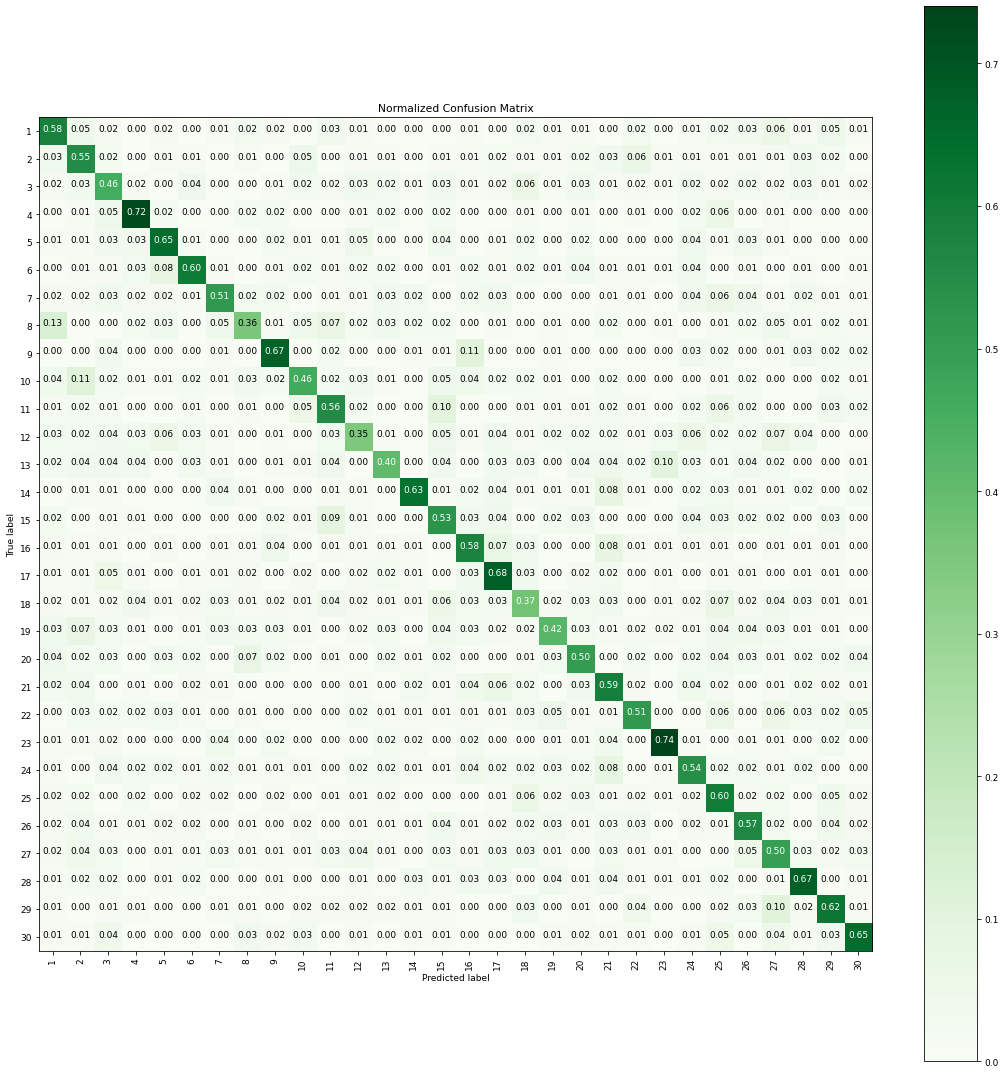


 F1 Score:0.5509849729857778
As epsilon = 2.0
training the model...
Done
==> training time:- 0:12:42.156242

Predicting test data
==> testing time:- 0:00:03.791981

==> Accuracy:- 0.5751691674021772


 ********Confusion Matrix********

 [[ 76   4   2   0   1   0   0   3   1   0   2   2   0   0   1   3   0   3
    2   0   0   3   0   0   3   5   8   1   6   1]
 [  3  53   2   0   0   1   0   1   0   3   0   2   1   0   1   1   2   1
    1   3   3   5   0   0   1   3   2   2   3   0]
 [  1   4  60   1   0   5   0   0   1   2   2   5   3   0   4   1   2   7
    0   4   1   2   0   3   2   3   3   3   1   3]
 [  0   0   5  77   2   0   0   1   2   0   1   2   0   0   2   0   0   2
    0   1   0   1   0   2   6   0   0   0   0   0]
 [  1   1   4   3  67   1   0   0   0   1   0   6   0   0   4   0   1   1
    0   2   0   0   0   5   0   3   1   0   1   0]
 [  0   0   1   3  10  68   0   0   1   0   1   2   2   0   1   2   0   2
    0   4   0   0   1   6   1   3   0   2   0   1]
 [  0   2   

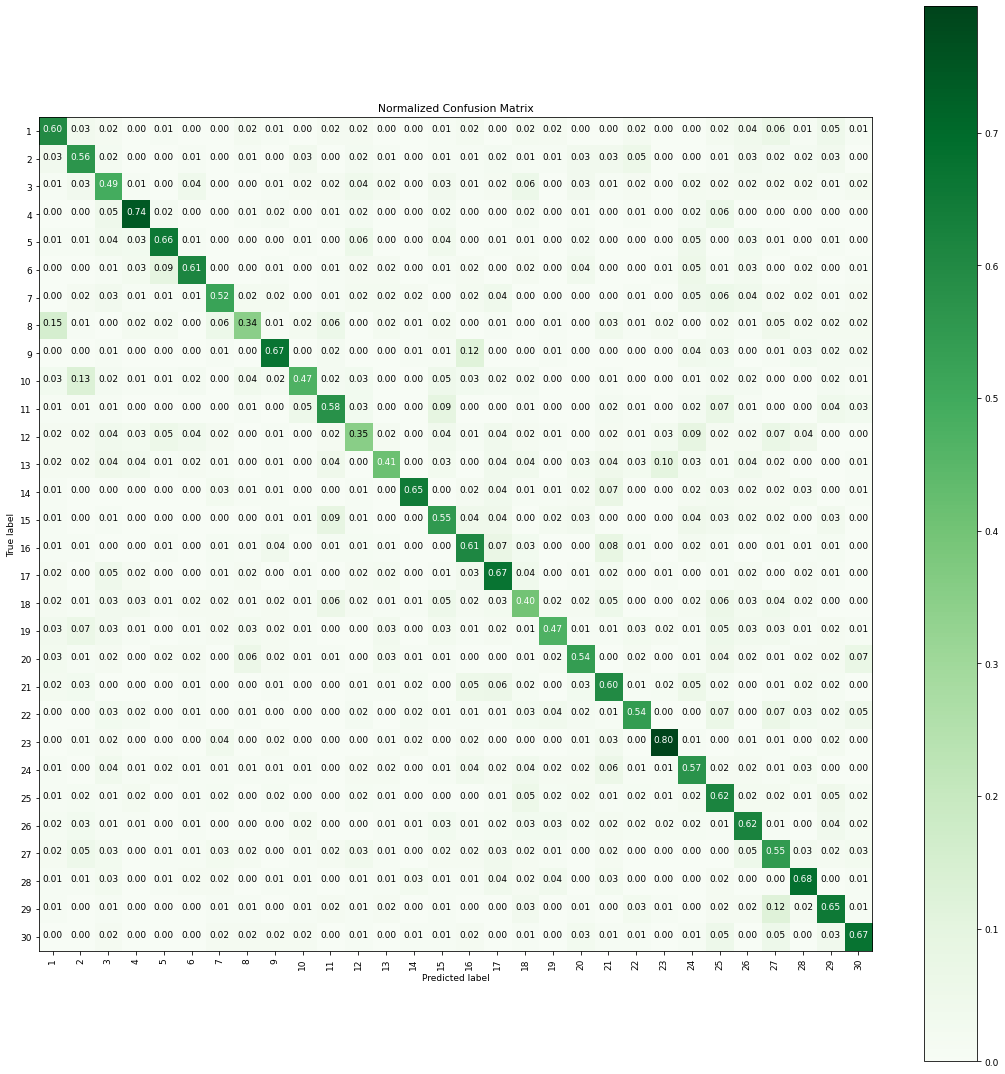


 F1 Score:0.5727425192153669
As epsilon = 2.5
training the model...
Done
==> training time:- 0:13:13.762810

Predicting test data
==> testing time:- 0:00:04.109401

==> Accuracy:- 0.5825242718446602


 ********Confusion Matrix********

 [[ 75   4   2   0   0   0   0   2   1   0   2   0   0   0   1   3   2   4
    3   0   0   3   0   0   3   5   9   1   6   1]
 [  3  52   2   0   0   1   0   0   0   2   1   1   2   0   1   2   2   1
    1   2   4   6   0   0   2   3   2   2   2   0]
 [  1   3  60   1   1   5   0   0   1   2   1   6   2   0   4   0   3   7
    0   5   0   3   0   2   2   3   3   3   2   3]
 [  0   0   5  78   1   0   0   1   1   0   1   3   0   0   2   0   0   2
    0   1   0   1   0   2   6   0   0   0   0   0]
 [  0   1   4   3  67   1   0   0   0   1   0   7   0   0   4   0   1   1
    0   2   0   0   0   5   0   2   2   0   1   0]
 [  0   0   1   3   9  70   0   0   1   0   1   1   2   0   1   2   0   2
    0   4   0   0   1   6   1   3   0   2   0   1]
 [  0   1   

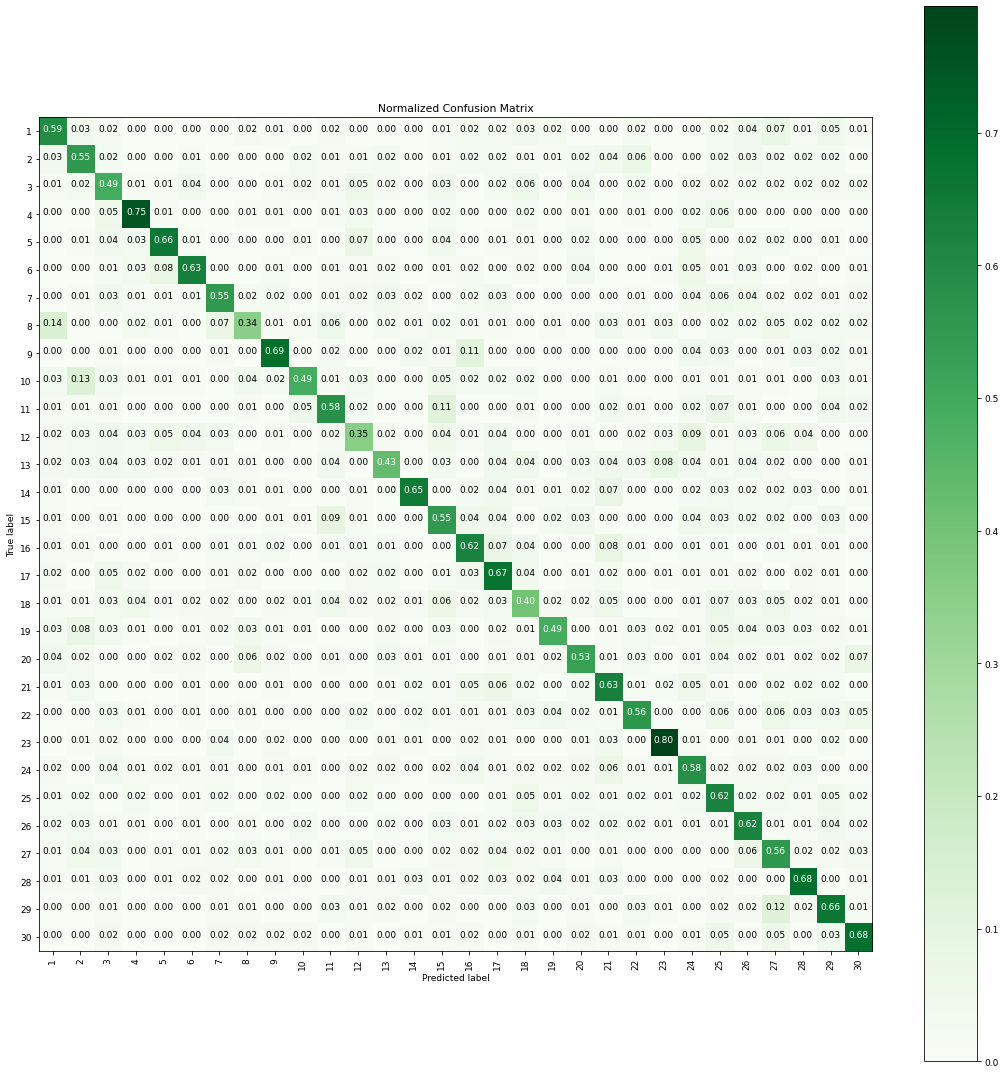


 F1 Score:0.5803741594148435
As epsilon = 3
training the model...
Done
==> training time:- 0:13:28.921029

Predicting test data
==> testing time:- 0:00:03.779364

==> Accuracy:- 0.5848779052662548


 ********Confusion Matrix********

 [[ 75   4   2   0   0   0   0   2   1   0   2   0   0   0   1   3   2   4
    3   0   0   3   0   0   3   5   9   1   6   1]
 [  4  53   2   0   0   1   0   0   0   1   1   1   2   0   0   1   2   1
    1   2   4   7   0   0   2   4   2   2   1   0]
 [  1   3  60   1   1   5   0   0   1   2   1   6   2   0   4   0   3   7
    0   5   0   3   0   2   2   3   3   3   2   3]
 [  0   0   5  79   2   0   0   1   1   0   1   3   0   0   2   0   0   1
    0   1   0   0   0   2   6   0   0   0   0   0]
 [  0   1   4   3  66   1   0   0   0   1   0   7   0   0   4   0   1   1
    0   2   0   0   0   5   0   3   2   0   1   0]
 [  0   0   1   2   8  70   0   0   1   0   1   1   3   0   1   2   0   2
    0   4   0   0   1   6   1   3   0   3   0   1]
 [  0   1   3 

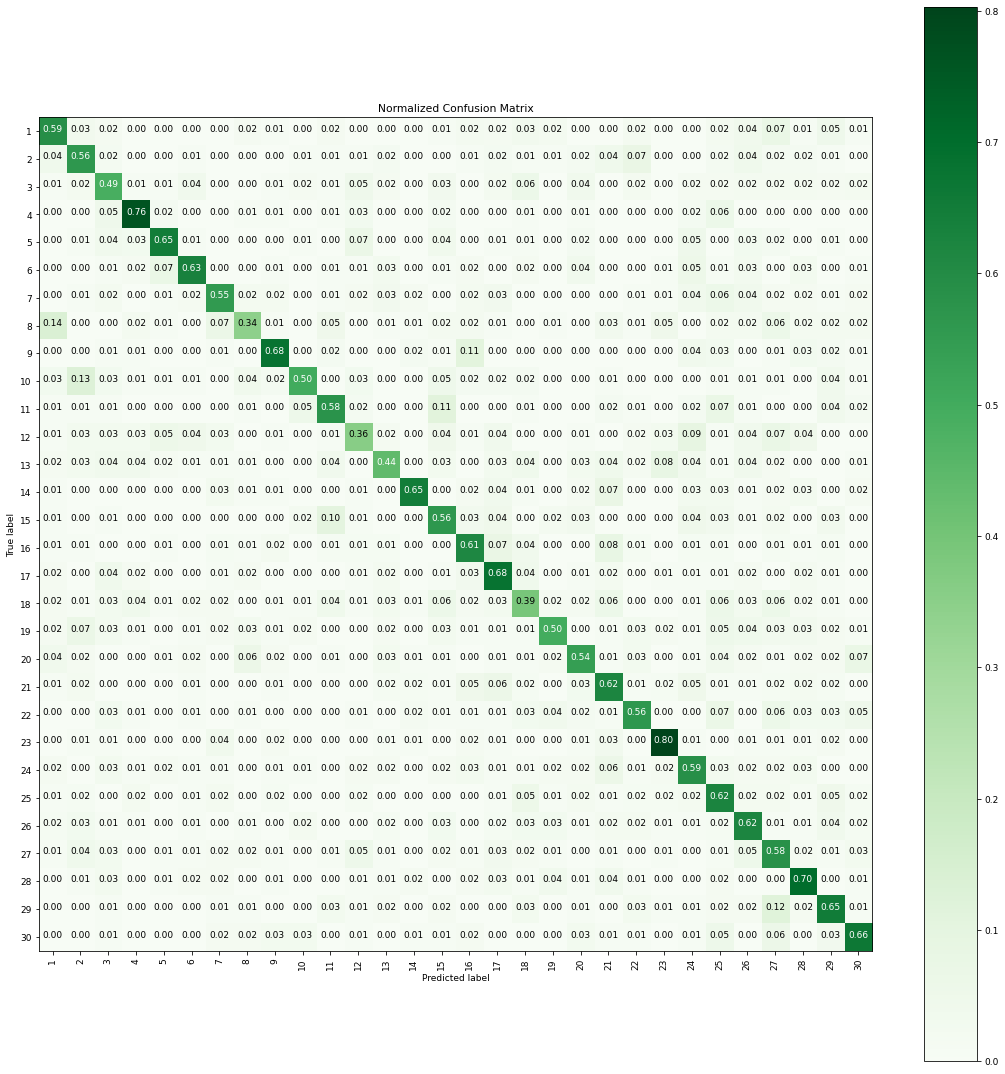


 F1 Score:0.5826589840528554
As epsilon = 4
training the model...
Done
==> training time:- 0:13:25.484517

Predicting test data
==> testing time:- 0:00:03.596740

==> Accuracy:- 0.588702559576346


 ********Confusion Matrix********

 [[ 77   3   2   0   0   0   0   2   1   0   2   0   0   0   1   3   2   4
    4   0   0   3   0   0   3   5   8   1   5   1]
 [  3  54   2   0   0   1   0   0   0   1   1   0   2   0   0   0   2   1
    1   2   4   7   0   0   2   5   2   3   1   0]
 [  1   3  60   1   1   5   0   0   1   0   1   6   2   0   4   0   3   7
    1   5   0   4   0   2   2   3   3   3   2   3]
 [  0   0   5  79   2   0   0   1   1   0   1   3   0   0   2   0   0   1
    0   1   0   0   0   2   6   0   0   0   0   0]
 [  0   1   4   3  66   3   0   0   0   0   0   6   0   0   4   0   1   1
    0   2   0   0   0   6   0   2   2   0   1   0]
 [  0   0   1   2   8  70   0   0   1   0   1   1   3   0   1   2   0   2
    0   4   0   0   1   6   1   3   0   3   0   1]
 [  0   1   2  


 F1 Score:0.5861570889176513
As epsilon = 5
training the model...
Done
==> training time:- 0:13:22.827360

Predicting test data
==> testing time:- 0:00:04.698068

==> Accuracy:- 0.5907619888202412


 ********Confusion Matrix********

 [[ 77   4   2   0   0   0   0   2   1   0   2   0   0   0   1   3   2   3
    4   0   0   3   0   0   3   5   8   1   5   1]
 [  3  54   2   0   0   1   0   0   0   1   1   0   2   0   0   0   2   1
    1   2   4   7   0   0   2   5   2   3   1   0]
 [  1   3  62   1   1   5   0   0   1   0   1   6   2   0   5   0   3   6
    0   5   0   4   0   2   2   2   3   3   2   3]
 [  0   0   5  79   2   0   0   1   1   0   1   3   0   0   2   0   0   1
    0   1   0   0   0   2   6   0   0   0   0   0]
 [  0   1   4   3  66   3   0   0   0   0   0   6   0   0   4   0   1   1
    0   2   0   0   0   6   0   2   2   0   1   0]
 [  0   0   1   2   8  70   0   0   1   0   1   1   3   0   1   2   0   2
    0   4   0   0   1   6   1   3   0   3   0   1]
 [  0   1   2 

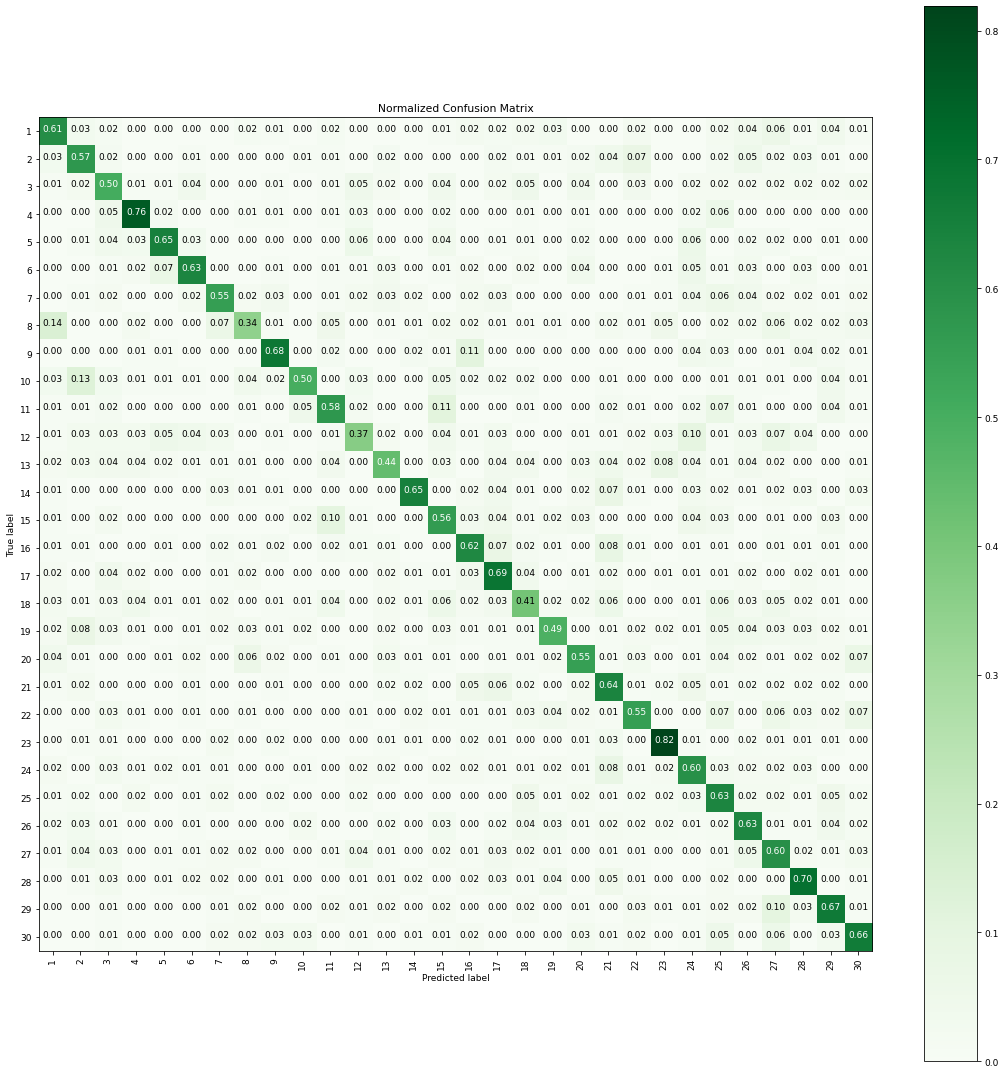


 F1 Score:0.5879002649071278


[0.05627851224778505, 0.06735832696440126, 0.08797405079496676, 0.18747816061434638, 0.31922053860869526, 0.49865425801220287, 0.5509849729857778, 0.5727425192153669, 0.5803741594148435, 0.5826589840528554, 0.5861570889176513, 0.5879002649071278]


In [55]:
from dp.ensemble import PrivateClassifier
from sklearn.metrics import classification_report

X_private = X_train.copy().values
y_private = y_train.copy().values
X_public = X_test.copy().values
y_public = y_test.copy().values

# parameters = {'epsilon': [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 4, 5]}

epsilons = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3, 4, 5]
f1_array_pate = list()

for epsilon in epsilons:
    
    print("As epsilon = {}".format(epsilon))

    # n_estimators: 訓練データを割り切れる数
    private_clf = PrivateClassifier(n_estimators=10, epsilon=epsilon ,random_state=1)
    private_clf_grid = GridSearchCV(private_clf, param_grid={}, n_jobs=-1, cv=5, verbose=1)
    private_clf_results, f1 = perform_model_epsilon(private_clf, X_private, y_private, X_public, y_public, class_labels=labels)
    
    f1_array_pate.append(f1)

# observe the attributes of the model 
# print_grid_search_attributes(private_clf_grid_results['model'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_pate, label='PATE')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()

print(f1_array_pate)


In [50]:
from syft.frameworks.torch.dp import pate

data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=private_clf.teacher_preds,
                                                   indices=y_public,
                                                   noise_eps=0.1, delta=1e-5)
print("Data Independent Epsilon:", data_ind_eps)
print("Data Dependent Epsilon:", data_dep_eps)

ModuleNotFoundError: No module named 'syft'

## 9. Comparing all models